<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 6 - Classification and Regression Using Multilayer Perceptron</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two logistic regression models- Binary and Multi-class Classification Using Logistic Regression.**



**Guidelines**
* Download `weatherAUS.csv` and `Car Prices.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 6 - Classification and Regression Using Multilayer Perceptron (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Classification Using Multilayer Perceptron 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a classification model using Multilayer Perceptron algorithm to predict the target variable `RainTomorrow` from the dataset.

> **Q1.5.** Tune the model's hyperparameters and discuss the results. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('weatherAUS.csv')
dataset.shape

(36881, 24)

In [3]:
dataset.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   5/18/2009        Hobart      5.1     14.3       0.0          1.8   
1    7/3/2009    Launceston      1.1     14.5       0.4          NaN   
2   2/18/2010   Williamtown     19.7     26.2       0.0          7.2   
3    3/4/2010  PerthAirport     16.6     28.0       0.0          9.0   
4    9/9/2010     GoldCoast     14.6     25.3       0.0          NaN   
5   9/28/2011       Mildura     15.7     27.3       0.0         11.2   
6  10/13/2011     Nuriootpa      9.8     23.9       0.0          4.4   
7    4/8/2010     NorahHead     18.7     27.6       3.0          NaN   
8  10/19/2009    Townsville     23.6     30.1       0.0         11.4   
9   2/23/2010  MountGambier      8.5     22.9       1.4          4.2   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0       8.9          NW           30.0        WSW  ...        47.0   
1       NaN         SSW           50.0          E  ...        46.0   
2       7.2         SSE           41.0        SSE  ...        50.0   
3      11.3          SW           54.0        SSE  ...        41.0   
4       NaN         NNW           43.0        WNW  ...        67.0   
5       5.6           N           65.0        ENE  ...        86.0   
6      10.5          SE           35.0        ENE  ...        29.0   
7       NaN         SSE           41.0        WNW  ...        64.0   
8      10.8           E           57.0        ESE  ...        48.0   
9      12.5         SSW           41.0        SSE  ...        41.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1023.1       1022.2       1.0       1.0      9.1     13.3         No   
1       1001.5       1002.4       NaN       NaN      1.3     13.7         No   
2       1020.9       1021.9       6.0       4.0     22.7     24.4         No   
3       1018.3       1014.9       6.0       1.0     20.0     26.1         No   
4       1020.3       1015.0       NaN       NaN     22.2     22.6         No   
5       1002.0        995.5       8.0       7.0     18.1     18.5         No   
6       1017.8       1013.9       3.0       4.0     15.5     23.0         No   
7       1013.2       1011.0       NaN       NaN     22.4     24.0        Yes   
8       1020.9       1018.0       4.0       2.0     27.4     27.9         No   
9       1023.1       1022.1       1.0       2.0     16.4     22.1        Yes   

   RISK_MM  RainTomorrow  
0      0.0            No  
1      0.0            No  
2      0.2            No  
3      0.0            No  
4      0.4            No  
5      5.6           Yes  
6      0.2            No  
7      0.2            No  
8      0.0            No  
9      0.0            No  

[10 rows x 24 columns]

In [4]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

**Q.1.1.1. Dealing with the missing data**

In [5]:
dataset.isna().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [6]:
# Droping the data where the value of a dependent variable is missing
dataset = dataset.dropna(subset=['RainTomorrow'])

In [7]:
dataset.isna().sum()

Date                 0
Location             0
MinTemp            205
MaxTemp             85
Rainfall           349
Evaporation      12392
Sunshine         13155
WindGustDir       3022
WindGustSpeed     3015
WindDir9am        2614
WindDir3pm         801
WindSpeed9am       506
WindSpeed3pm       490
Humidity9am        416
Humidity3pm        358
Pressure9am       3354
Pressure3pm       3328
Cloud9am         12038
Cloud3pm         12517
Temp9am            335
Temp3pm            293
RainToday          349
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
# Imputing data for numeric columns
from sklearn.impute import KNNImputer
numeric_columns = dataset.select_dtypes(include='number').columns
imputer = KNNImputer()
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

In [9]:
# Imputing data for string columns
string_columns = dataset.select_dtypes(include='object').columns
for column in string_columns:
    mode_value = dataset[column].mode()[0]
    dataset[column] = dataset[column].fillna(mode_value)

In [10]:
dataset.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

**Q.1.1.2. Dealing with the irregular data (outliers)**


Unique values for Date column: ['5/18/2009' '7/3/2009' '2/18/2010' ... '12/26/2007' '11/15/2007'
 '11/23/2007']

Unique values for Location column: ['Hobart' 'Launceston' 'Williamtown' 'PerthAirport' 'GoldCoast' 'Mildura'
 'Nuriootpa' 'NorahHead' 'Townsville' 'MountGambier' 'MelbourneAirport'
 'SydneyAirport' 'Darwin' 'Newcastle' 'Watsonia' 'CoffsHarbour'
 'MountGinini' 'Sale' 'PearceRAAF' 'Adelaide' 'Albury' 'Richmond'
 'Walpole' 'Cairns' 'BadgerysCreek' 'AliceSprings' 'Bendigo' 'SalmonGums'
 'Canberra' 'Ballarat' 'Woomera' 'Penrith' 'WaggaWagga' 'Dartmoor' 'Perth'
 'Cobar' 'Sydney' 'Melbourne' 'NorfolkIsland' 'Tuggeranong' 'Albany'
 'Moree' 'Wollongong' 'Portland' 'Brisbane' 'Witchcliffe']


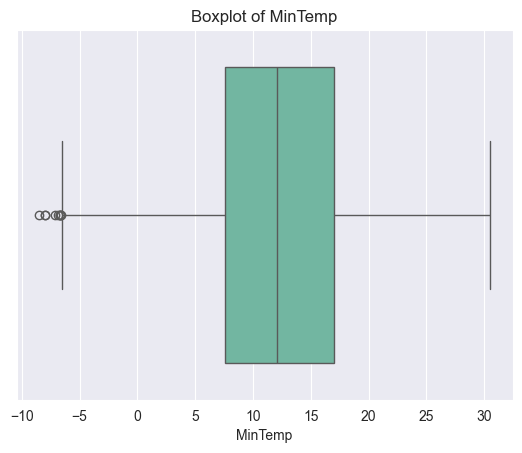

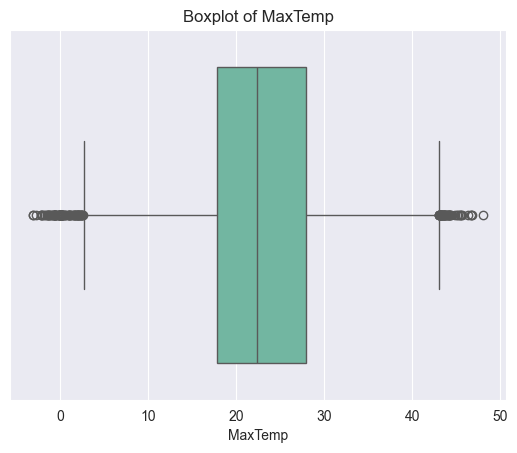

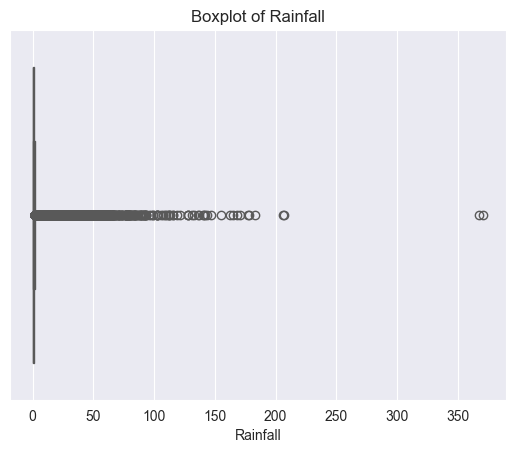

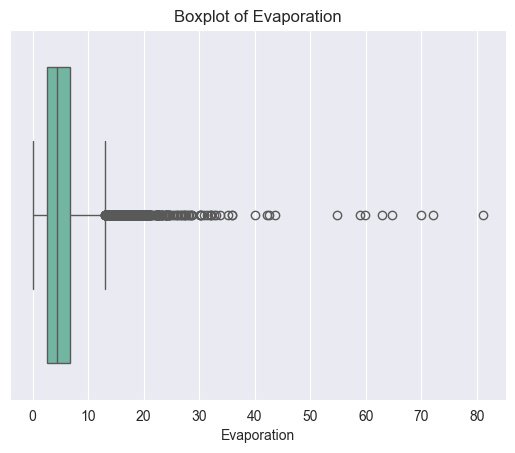

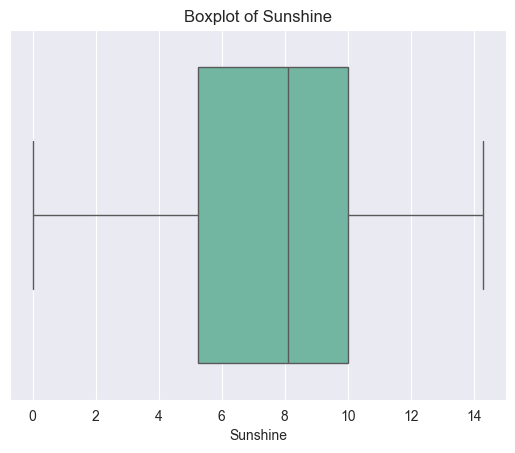


Unique values for WindGustDir column: ['NW' 'SSW' 'SSE' 'SW' 'NNW' 'N' 'SE' 'E' 'S' 'WSW' 'W' 'NE' 'NNE' 'WNW'
 'ESE' 'ENE']


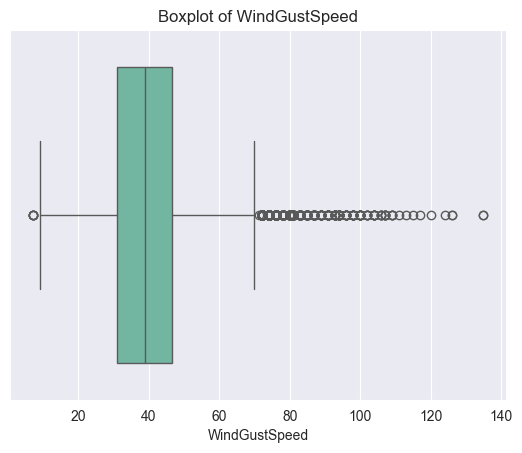


Unique values for WindDir9am column: ['WSW' 'E' 'SSE' 'WNW' 'ENE' 'ESE' 'NW' 'N' 'NE' 'SE' 'NNW' 'W' 'NNE' 'S'
 'SW' 'SSW']

Unique values for WindDir3pm column: ['SSE' 'SW' 'N' 'NNE' 'S' 'E' 'W' 'SE' 'NW' 'ESE' 'NE' 'ENE' 'WSW' 'WNW'
 'SSW' 'NNW']


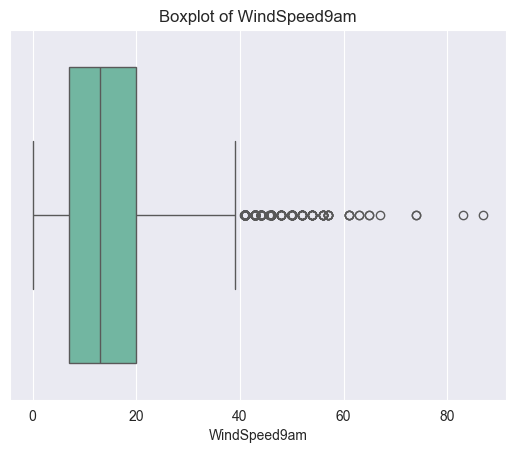

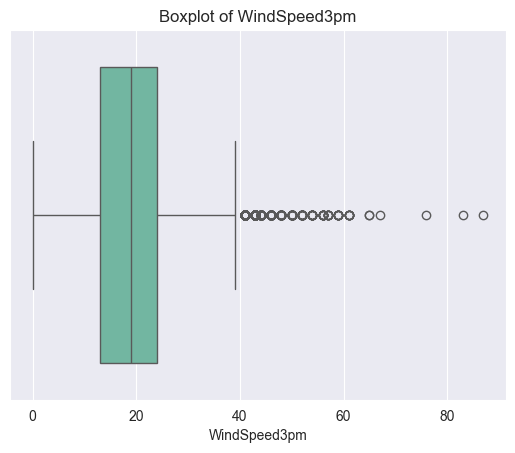

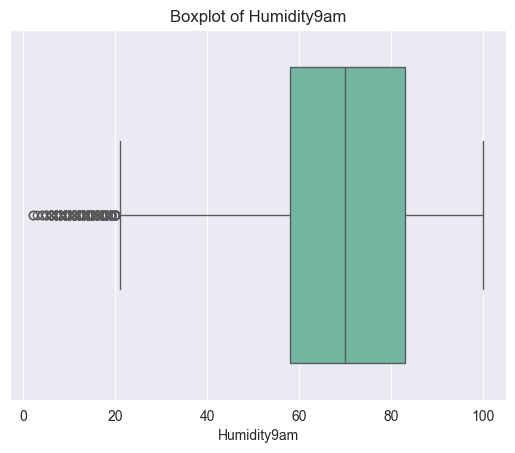

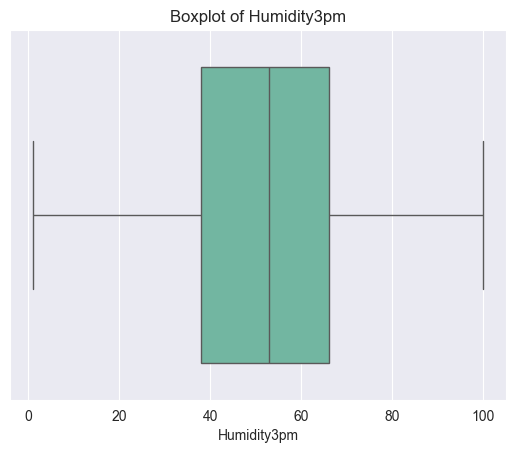

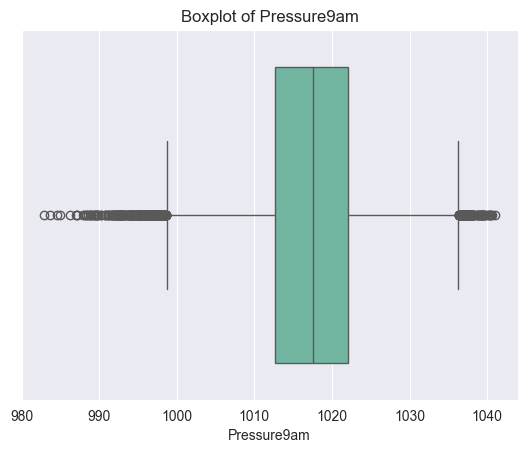

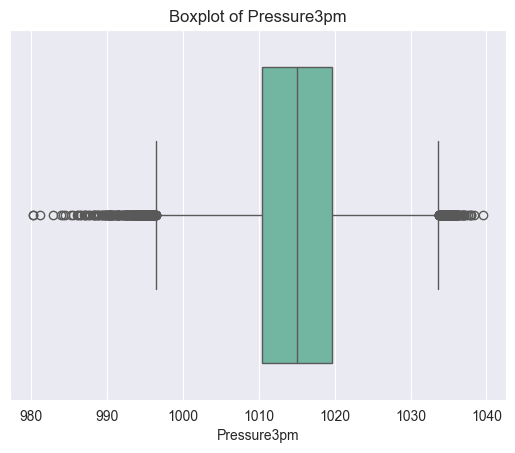

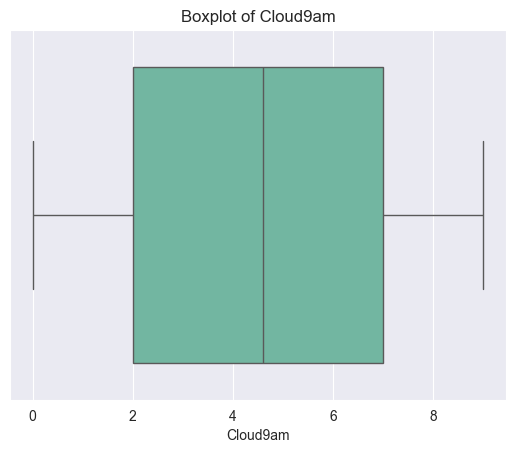

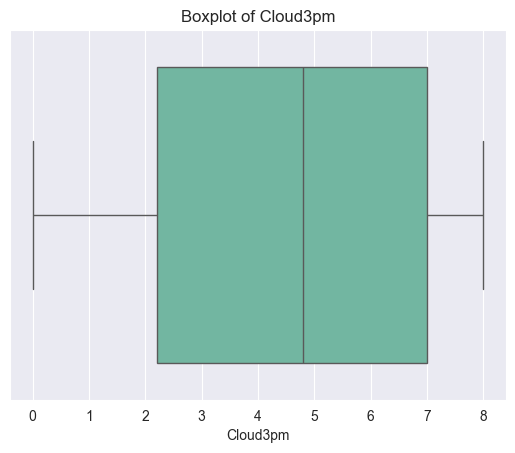

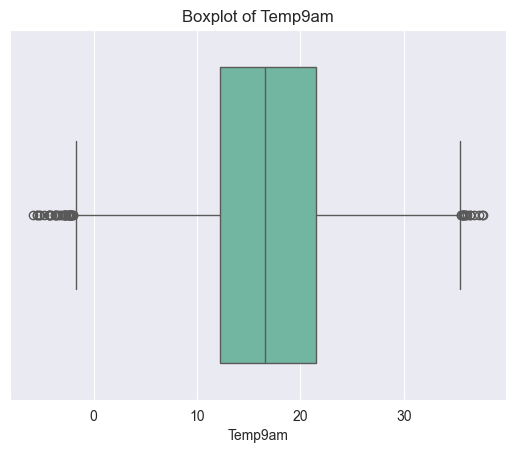

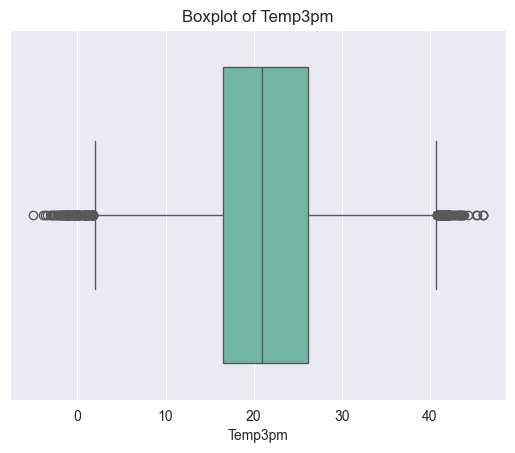


Unique values for RainToday column: ['No' 'Yes']


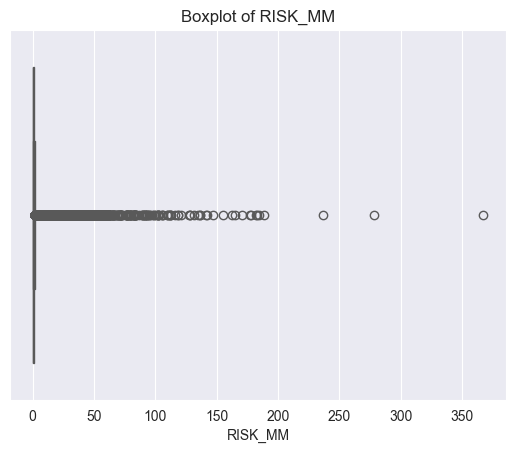


Unique values for RainTomorrow column: ['No' 'Yes']


In [11]:
for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', dataset[column].unique())

In [12]:
# Remove outliers for numeric data using Isolation Forest
from sklearn.ensemble import IsolationForest
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05)
outlier_mask = iso_forest.fit_predict(dataset[numeric_columns])
dataset = dataset[outlier_mask != -1]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34448 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           34448 non-null  object 
 1   Location       34448 non-null  object 
 2   MinTemp        34448 non-null  float64
 3   MaxTemp        34448 non-null  float64
 4   Rainfall       34448 non-null  float64
 5   Evaporation    34448 non-null  float64
 6   Sunshine       34448 non-null  float64
 7   WindGustDir    34448 non-null  object 
 8   WindGustSpeed  34448 non-null  float64
 9   WindDir9am     34448 non-null  object 
 10  WindDir3pm     34448 non-null  object 
 11  WindSpeed9am   34448 non-null  float64
 12  WindSpeed3pm   34448 non-null  float64
 13  Humidity9am    34448 non-null  float64
 14  Humidity3pm    34448 non-null  float64
 15  Pressure9am    34448 non-null  float64
 16  Pressure3pm    34448 non-null  float64
 17  Cloud9am       34448 non-null  float64
 18  Cloud3pm   

**Q.1.1.3. Dealing with the unnecessary data**

In [14]:
# The column 'Date' seems unnecessary in predicting the dependent variable 'RainTomorrow', so let's drop that column
columns_to_drop = ['Date']
dataset = dataset.drop(columns=columns_to_drop)

**Q.1.1.4. Dealing with the inconsistent data**

In [15]:
# Function to extract unique characters from a string in sorted order
def unique_characters_sorted(string):
    return ''.join(sorted(set(string)))

columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in columns:
    dataset[column] = dataset[column].apply(lambda x: unique_characters_sorted(x))
    print(dataset[column].unique())

['NW' 'SW' 'ES' 'N' 'E' 'S' 'W' 'EN']
['SW' 'E' 'ES' 'NW' 'EN' 'N' 'W' 'S']
['ES' 'SW' 'N' 'EN' 'S' 'E' 'NW' 'W']


**Q.1.1.5. Encoding categorical data**

In [16]:
# Label Encoding
dataset['Location'] = dataset['Location'].astype('category').cat.codes

# One Hot Encoding
dataset = pd.get_dummies(dataset, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
dataset = dataset.replace({True:1, False:0})

In [17]:
dataset.RainTomorrow.value_counts()

RainTomorrow
No     27006
Yes     7442
Name: count, dtype: int64

In [18]:
dataset.RainTomorrow.replace(['Yes', 'No'], [1,0], inplace=True)

In [19]:
dataset

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            15      5.1     14.3       0.0         1.80      8.90   
1            16      1.1     14.5       0.4         1.96      6.50   
2            42     19.7     26.2       0.0         7.20      7.20   
3            30     16.6     28.0       0.0         9.00     11.30   
4            14     14.6     25.3       0.0         6.36     10.18   
...         ...      ...      ...       ...          ...       ...   
36876        29     10.1     14.2       7.4         3.40      0.00   
36877        30      6.3     26.0       0.0         5.00     10.60   
36878        13     20.5     31.7       0.0         7.00     11.10   
36879        29      6.3     23.3       0.0         5.20     11.60   
36880        26      9.4     26.3       0.0         4.80     12.20   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
0               30.0           7.0           6.0         65.0  ...   
1               50.0           7.0          24.0         99.0  ...   
2               41.0          19.0          31.0         48.0  ...   
3               54.0          28.0          33.0         50.0  ...   
4               43.0           6.0          28.0         64.0  ...   
...              ...           ...           ...          ...  ...   
36876           46.0          19.0          15.0         84.0  ...   
36877           37.0           9.0          26.0         38.0  ...   
36878           37.0          20.0          13.0         54.0  ...   
36879           39.0           9.0          20.0         50.0  ...   
36880           35.0          15.0          20.0         50.0  ...   

       WindDir3pm_E  WindDir3pm_EN  WindDir3pm_ES  WindDir3pm_N  \
0                 0              0              1             0   
1                 0              0              0             0   
2                 0              0              1             0   
3                 0              0              0             0   
4                 0              0              0             1   
...             ...            ...            ...           ...   
36876             0              0              0             1   
36877             0              0              0             0   
36878             0              0              1             0   
36879             0              0              0             0   
36880             0              0              0             0   

       WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SW  WindDir3pm_W  RainToday_No  \
0                  0             0              0             0             1   
1                  0             0              1             0             1   
2                  0             0              0             0             1   
3                  0             0              1             0             1   
4                  0             0              0             0             1   
...              ...           ...            ...           ...           ...   
36876              0             0              0             0             0   
36877              0             0              1             0             1   
36878              0             0              0             0             1   
36879              0             0              1             0             1   
36880              0             0              1             0             1   

       RainToday_Yes  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
36876              1  
36877              0  
36878              0  
36879              0  
36880              0  

[34448 rows x 45 columns]

**Q.1.2. Visualize the dataset**

In [20]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

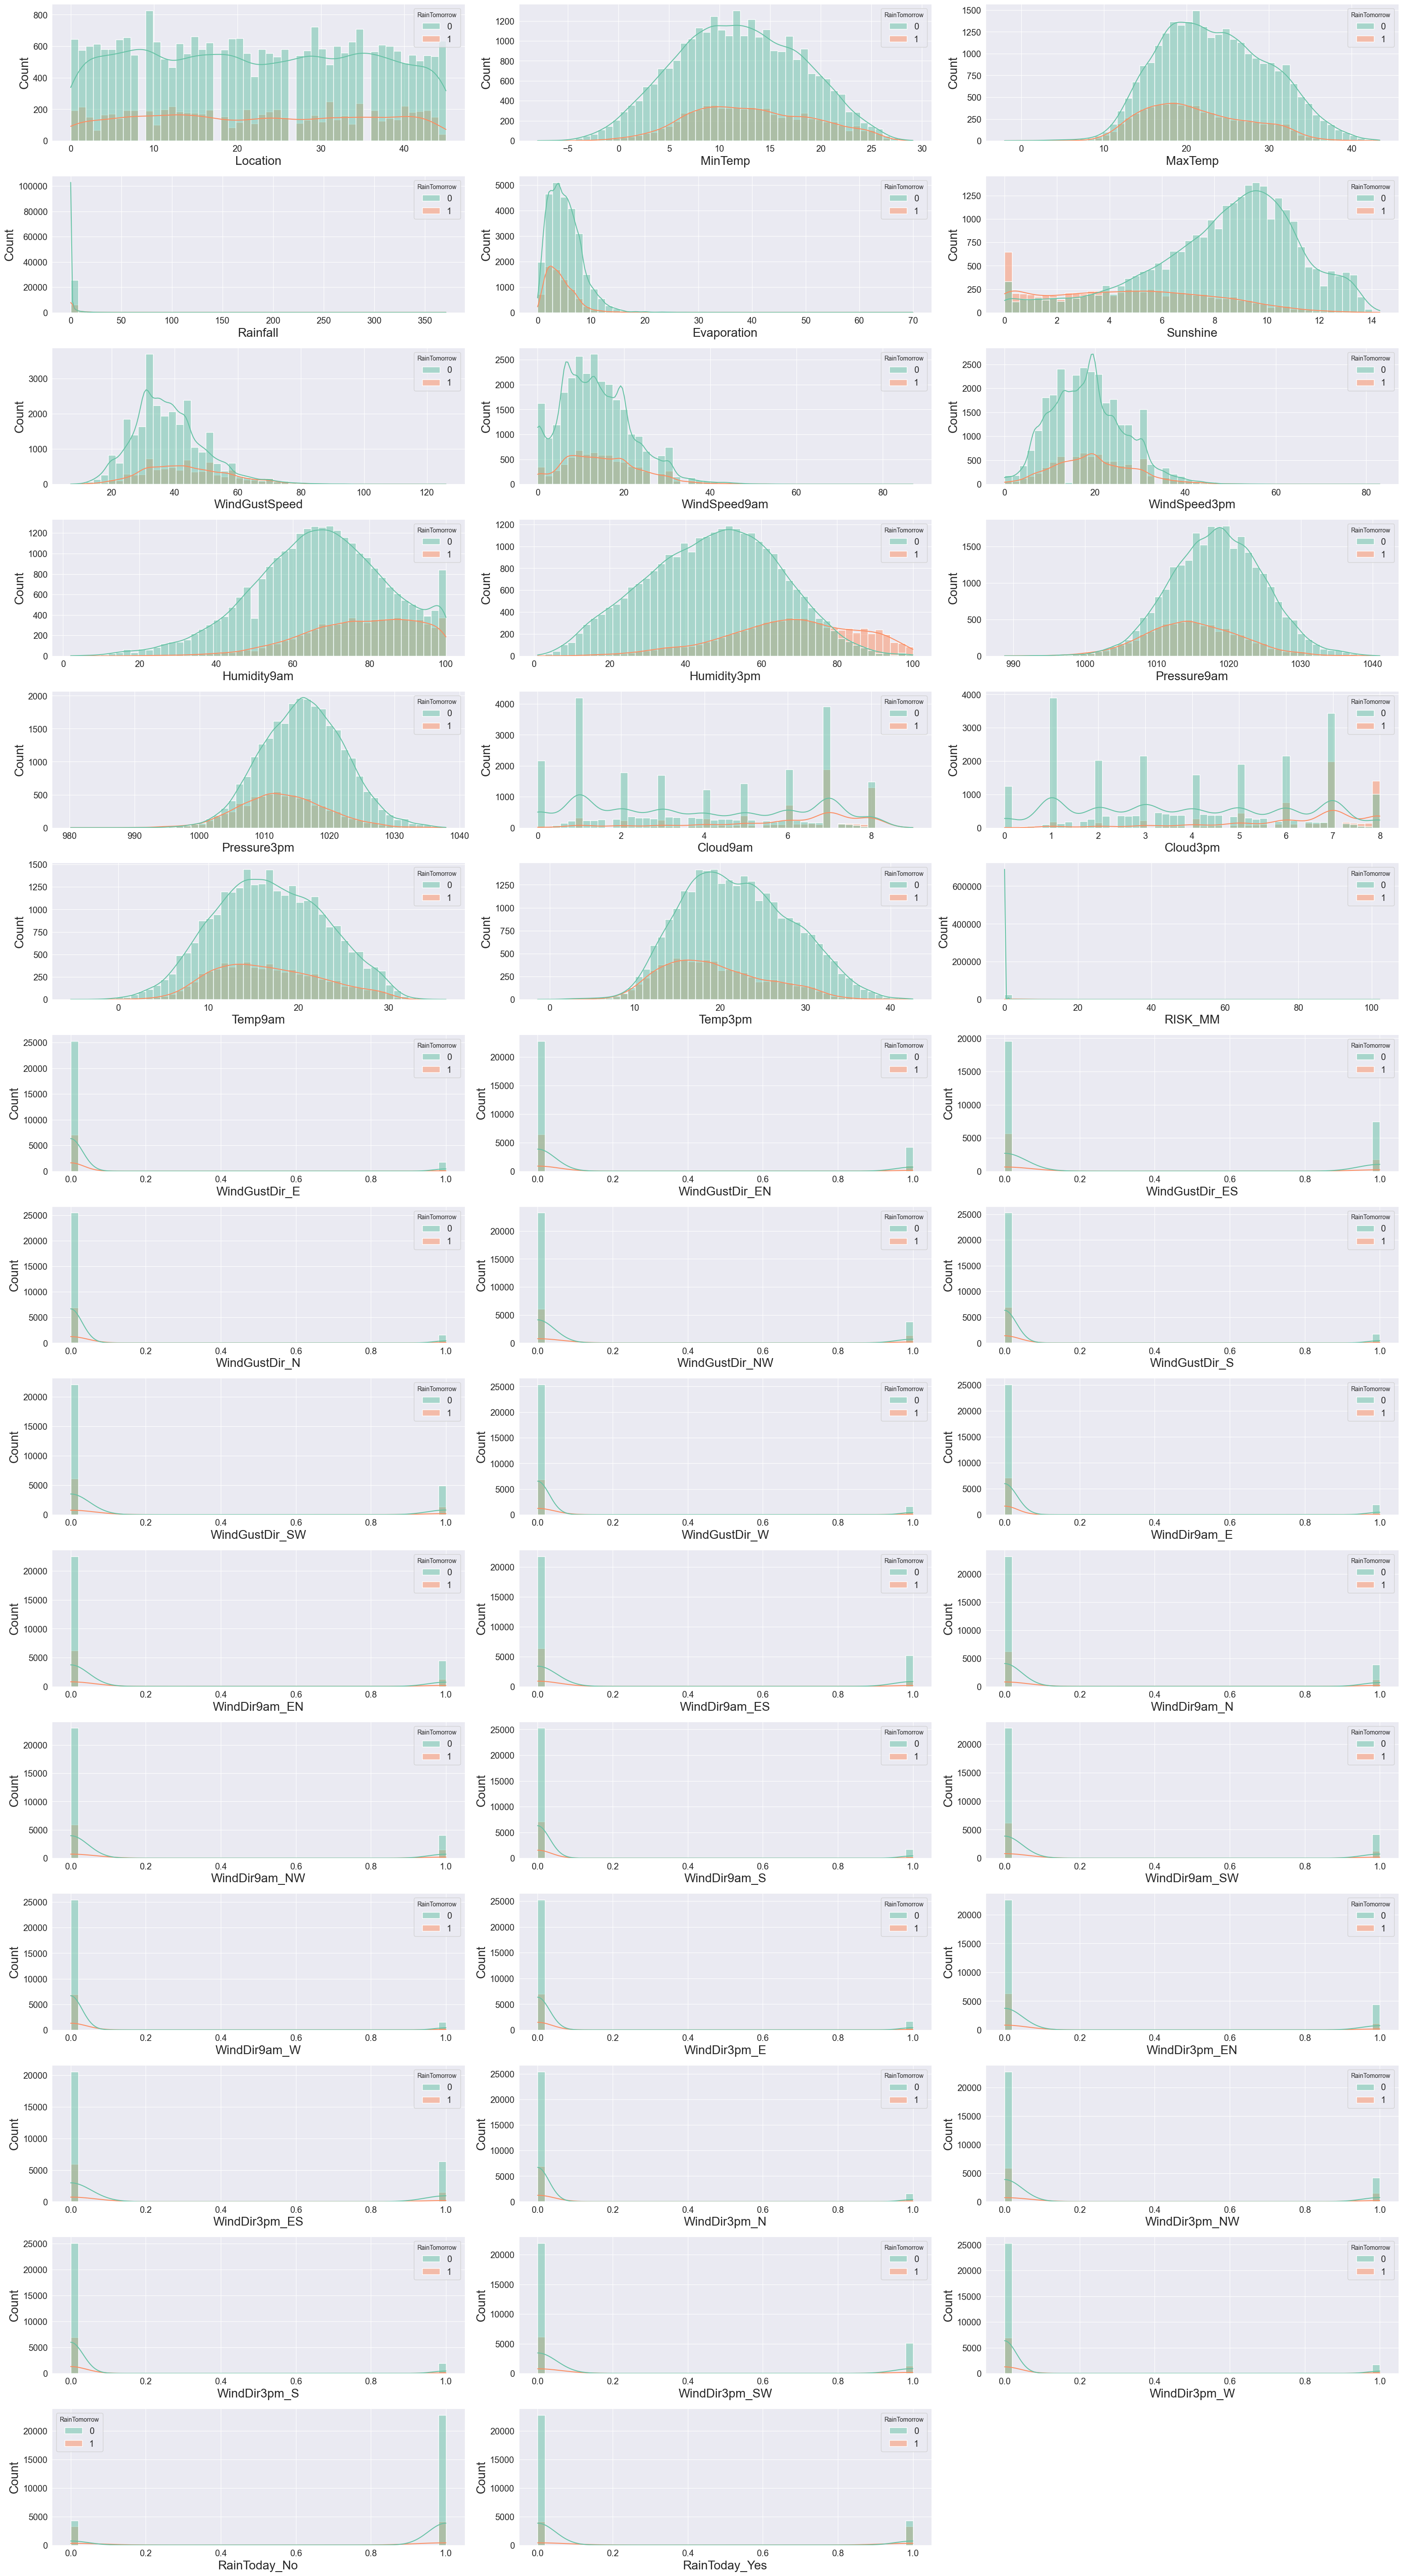

In [21]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(dataset, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

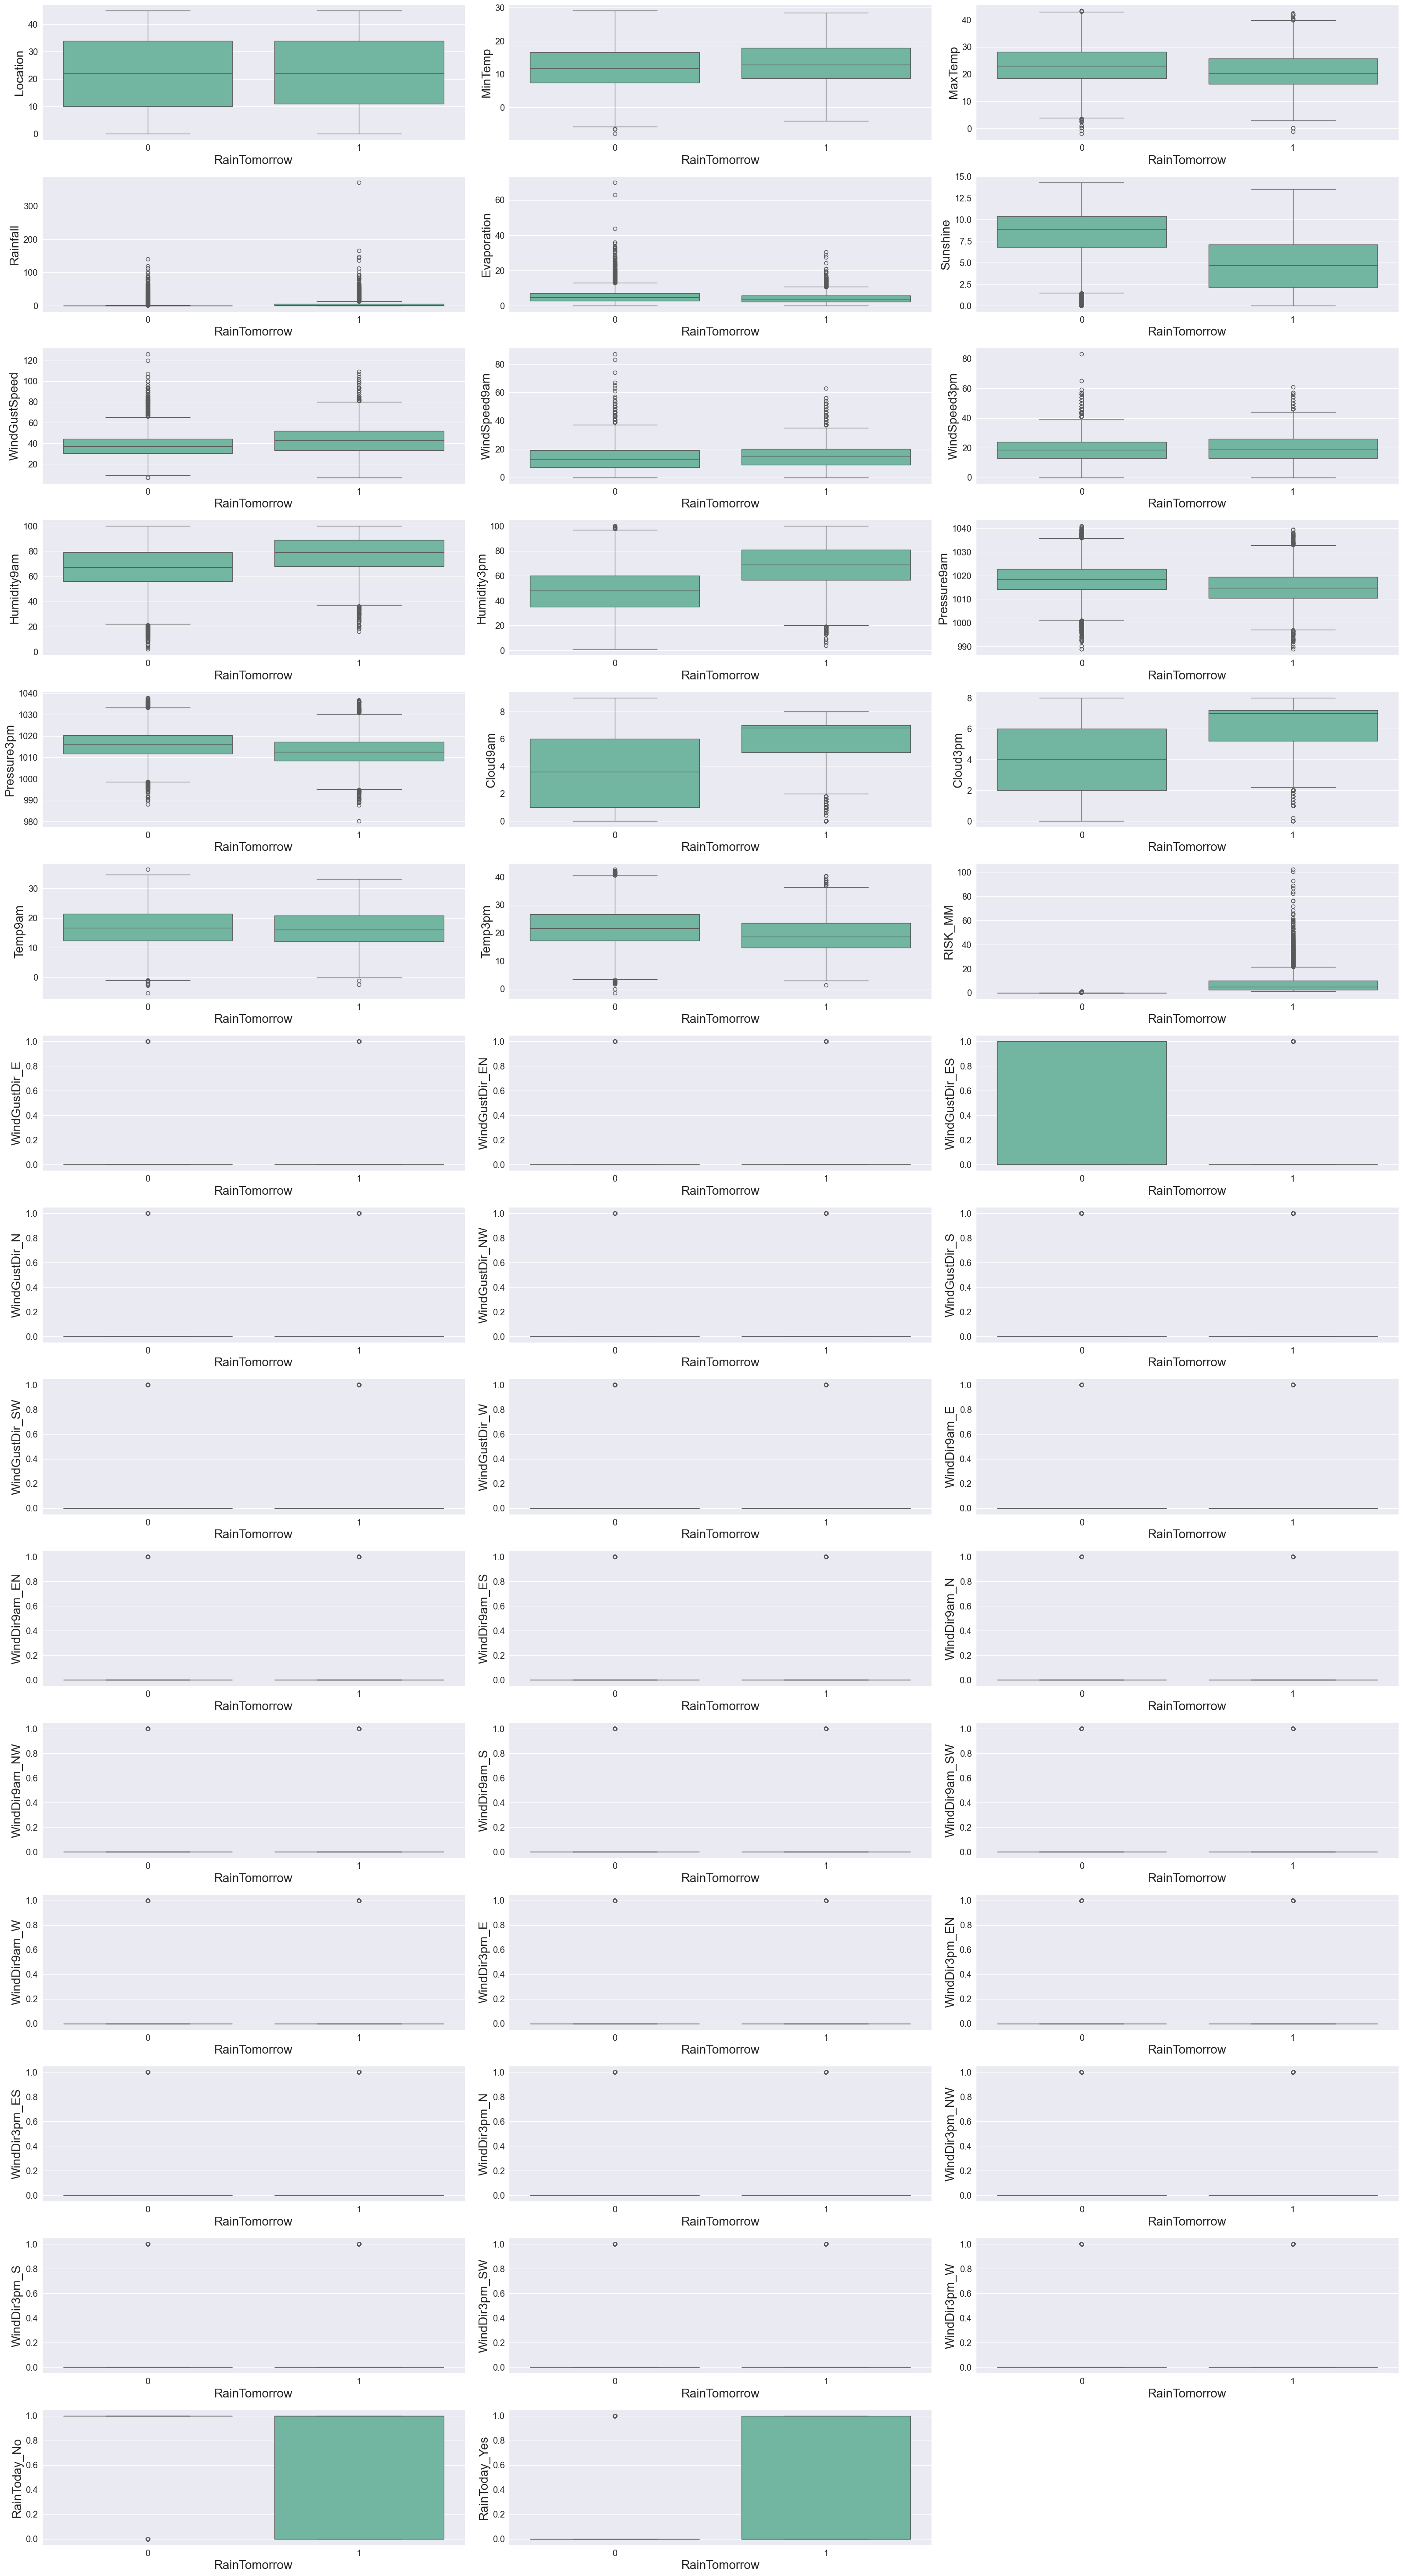

In [22]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=dataset, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

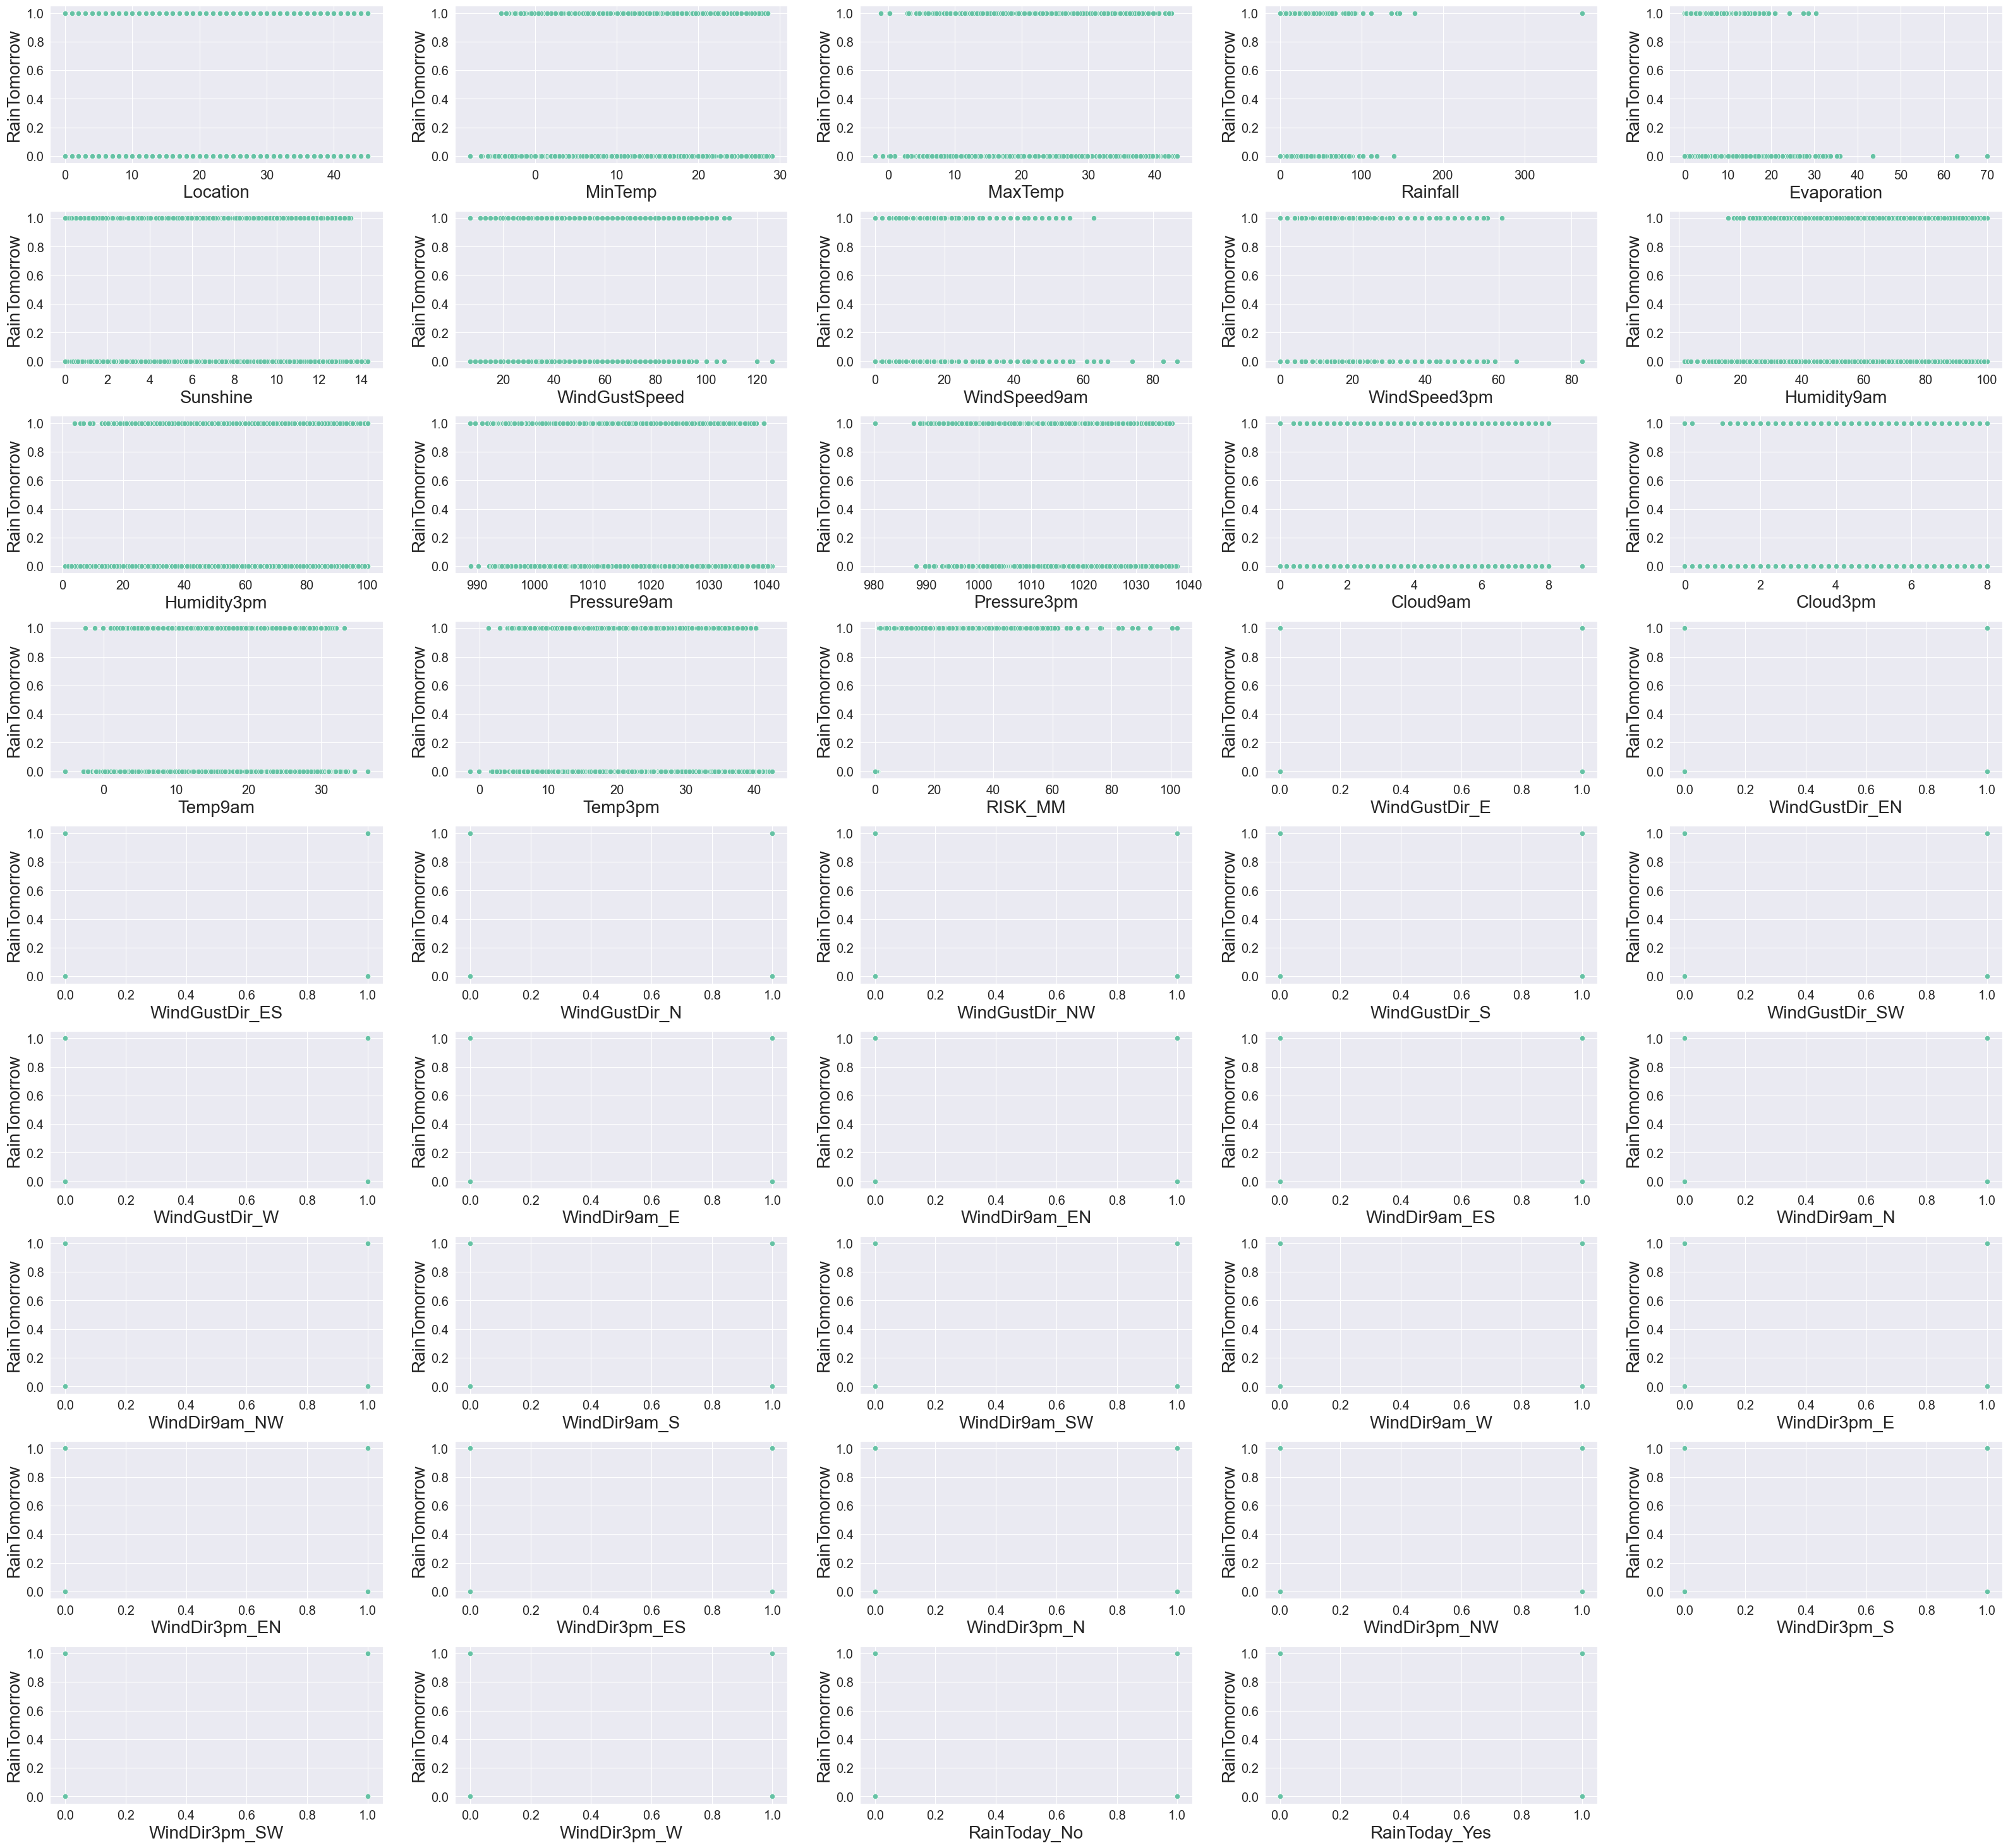

In [23]:
plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=dataset, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()

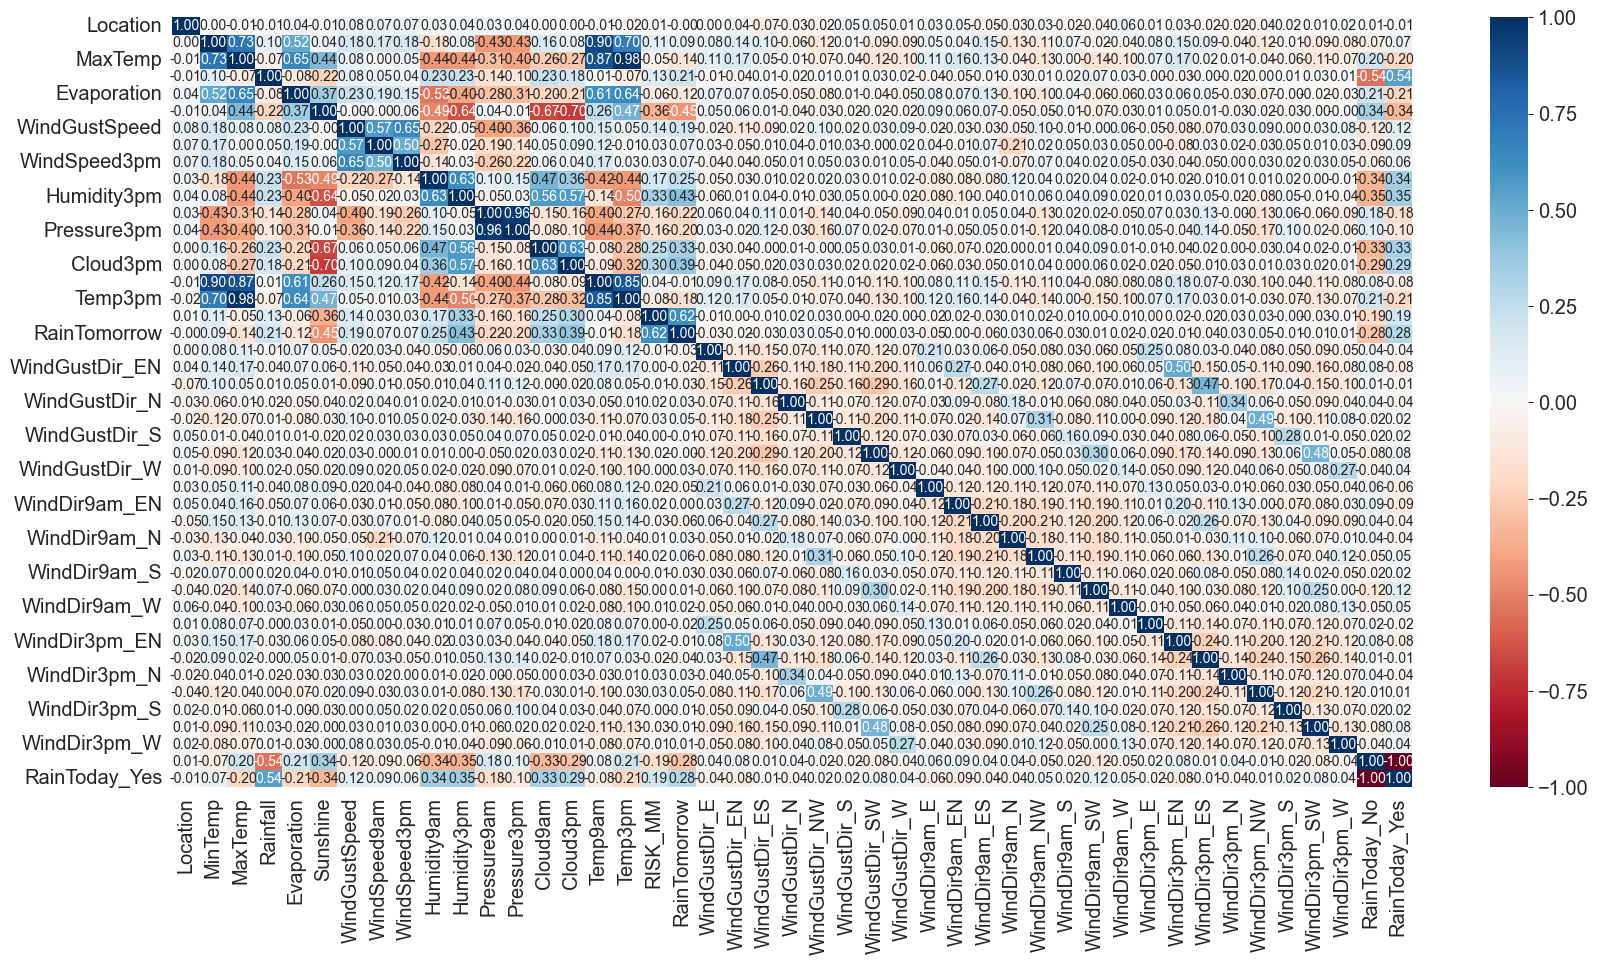

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

**Q.1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

**Answer:** Upon reviewing the dataset, it is found that there exist 36881 rows and 23 columns to predict the dependent variable 'RainTomorrow' i.e. 24 total columns. This dataset consists of some of the missing values, outliers, unnecessary data, and inconsistent data. The dependent variable had 620 missing values. Therefore, we had to drop these rows as imputing the value of the dependent variable is not a good practice, and dropping 620 rows out of 36881 can be considered significantly small.

After dropping the 'Date' column, as it does not seem to provide any contribution in predicting the dependent variable 'RainTomorrow' and correcting the inconsistent values by deleting the duplicate acronyms for direction and sorting the acronyms, we encoded the categorical values. Since, the column 'Location' had a lot of distinct values, applying 'One Hot Encoding' would not be the best solution. Therefore, we applied 'Label Encoding' for 'Location' and the rest was encoded with 'One Hot Encoding' except the dependent variable 'RainTomorrow' which was encoded using 'Find and Replace.'

Reviewing the heatmap of all the resulting columns, it was clear that there is a high correlation between the dependent variable 'RainTomorrow' and the independent variable 'Sunshine', 'Humidity3pm', 'Cloud3pm', and 'Temp3pm.'

**Q.1.4. Build a classification model using Multilayer Perceptron algorithm to predict the target variable RainTomorrow from the dataset.**

In [25]:
# Getting independent and dependent variables 
y = dataset.RainTomorrow.values
X = dataset.drop(['RainTomorrow'], axis=1)

In [26]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled

array([[-0.38805473,  0.50912195,  0.21973406, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [-0.16230613, -1.56942585, -0.3735342 , ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [-0.61380333,  1.38600931,  0.61524624, ..., -0.2634853 ,
        -1.88408522,  1.88408522],
       ...,
       [ 1.41793408, -1.78052836, -1.42316265, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [ 1.34268455,  0.4928833 ,  1.19330249, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [ 0.81593781, -0.80620908, -0.57129028, ..., -0.2634853 ,
         0.53076155, -0.53076155]])

In [29]:
X_test_scaled

array([[-0.23755566,  0.46040599,  2.02996285, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [ 1.41793408, -0.44895867,  0.38706614, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [ 0.96643688,  1.1749068 , -0.46480624, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       ...,
       [ 0.28919107,  0.20058751,  0.88906236, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [ 0.06344247,  1.30481603,  0.61524624, ..., -0.2634853 ,
         0.53076155, -0.53076155],
       [-0.83955193,  0.80141774,  0.38706614, ..., -0.2634853 ,
         0.53076155, -0.53076155]])

In [30]:
# Create MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50),
                               activation='relu',
                               solver='adam',
                               max_iter=500,
                               random_state=42)

In [31]:
# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [32]:
# Predictions
y_pred = mlp_classifier.predict(X_test_scaled)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9939042089985486


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5448
           1       0.99      0.98      0.99      1442

    accuracy                           0.99      6890
   macro avg       0.99      0.99      0.99      6890
weighted avg       0.99      0.99      0.99      6890



[[5433   15]
 [  27 1415]]


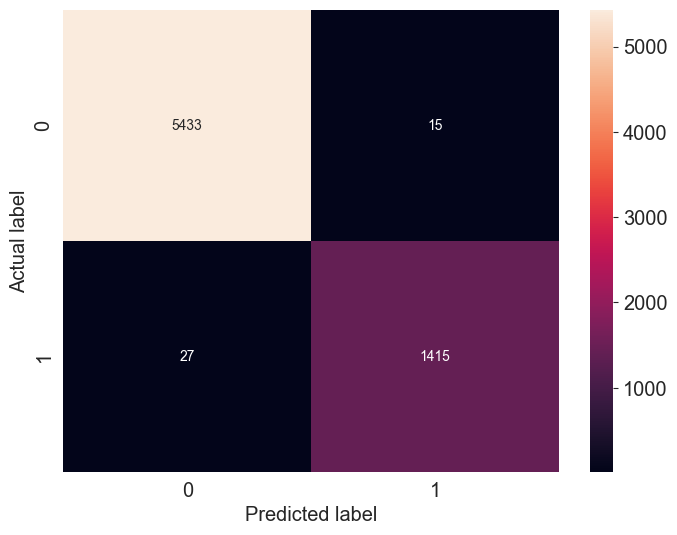

In [37]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

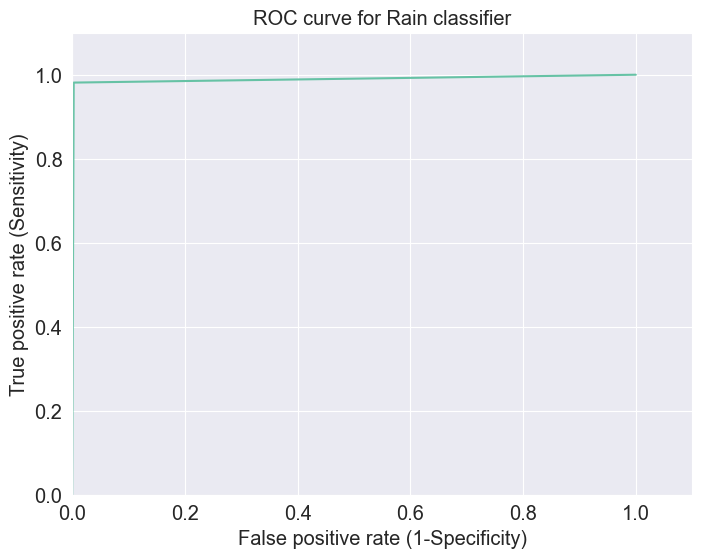

In [38]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Rain classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9892613507915463

**Q.1.5. Tune the model's hyperparameters and discuss the results.**

In [40]:
# Define parameter distribution
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, 0, 5),
}

# Perform Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(MLPClassifier(max_iter=2000, random_state=42), param_dist, cv=5, n_iter=10)
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'tanh'}


In [41]:
# Evaluate model with best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.9984034833091436


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5448
           1       1.00      1.00      1.00      1442

    accuracy                           1.00      6890
   macro avg       1.00      1.00      1.00      6890
weighted avg       1.00      1.00      1.00      6890



[[5443    5]
 [   6 1436]]


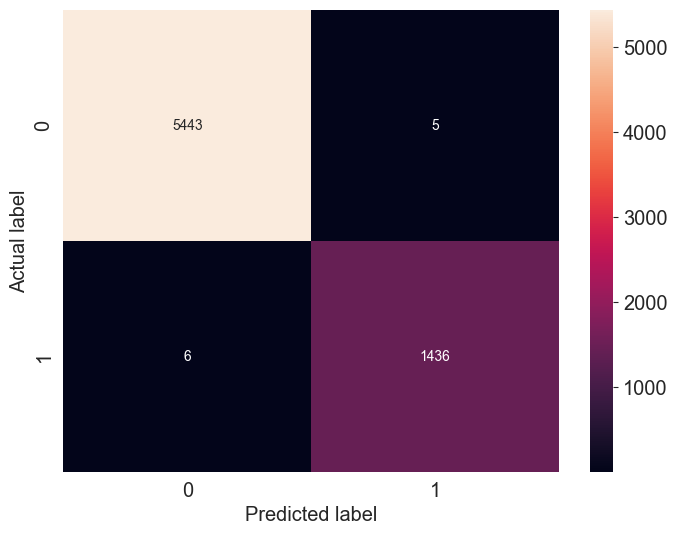

In [43]:
plt.figure(figsize=(8,6))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

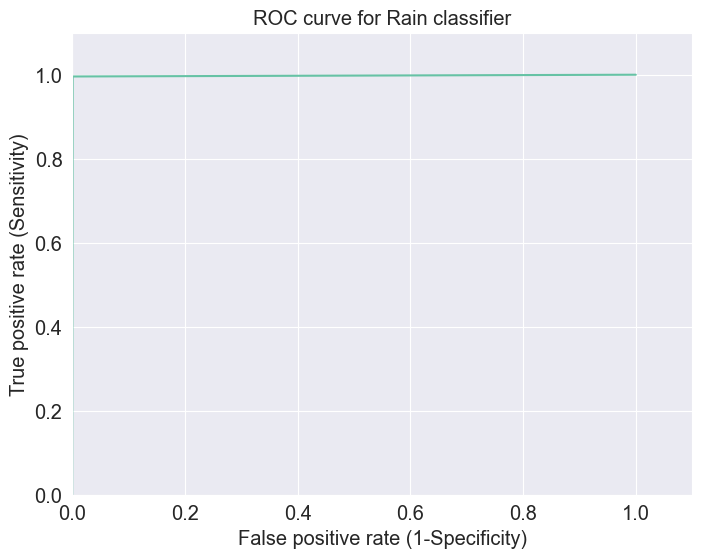

In [44]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Rain classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [45]:
roc_auc_score(y_test,y_pred)

0.997460672177857

**Answer:** In the beginning, the MLPClassifier was built using two hidden layers with 100 and 50 nodes. 'Relu' was used as an activation function, and 'adam' was used as a solver. This model predicted the dependent variable 'RainTomorrow' with an accuracy of 99.39%. However, after the hyperparameter tuning of this model, we received an accuracy of 99.84%, which shows an increase in model performance. The model, which was built after hyperparameter tuning, has the same parameters as the prior one, except for the activation function, which is 'tanh' instead of 'relu.'

Not only has the accuracy of the model been improved, but all other performance measures have also increased. For example, precision and f1-score have been improved from 0.99 to 1, whereas recall has been improved from 0.98 to 1 for the class "No" of the dependent variable 'RainTomorrow'. Additionally, there is improvement in the confusion matrix, with a decrease in false positives and false negatives and an increase in true positives. Previously, there were 15 false positives, 27 false negatives, and 1415 true positives, whereas now it is 5 false positives, 6 false negatives, and 1436 true positives. Finally, the area under the ROC curve has also been improved from 0.98 to 0.99.

# Question 2: Regression Using Multilayer Perceptron 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `Car Prices.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset: This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 

> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Build a multilayer perceptron model to predict the car `price` based on the other features in the dataset 

> **Q2.5.** Tune the model's hyperparameters and discuss the results.

In [46]:
cars = pd.read_csv('Car Prices.csv')

In [47]:
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [48]:
cars.shape

(205, 26)

**Q.2.1.1. Dealing with the missing data**

In [49]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [50]:
missing_data = cars.isnull().sum()
missing_data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Answer: No any missing data**

**Q.2.1.2. Dealing with the irregular data (outliers)**

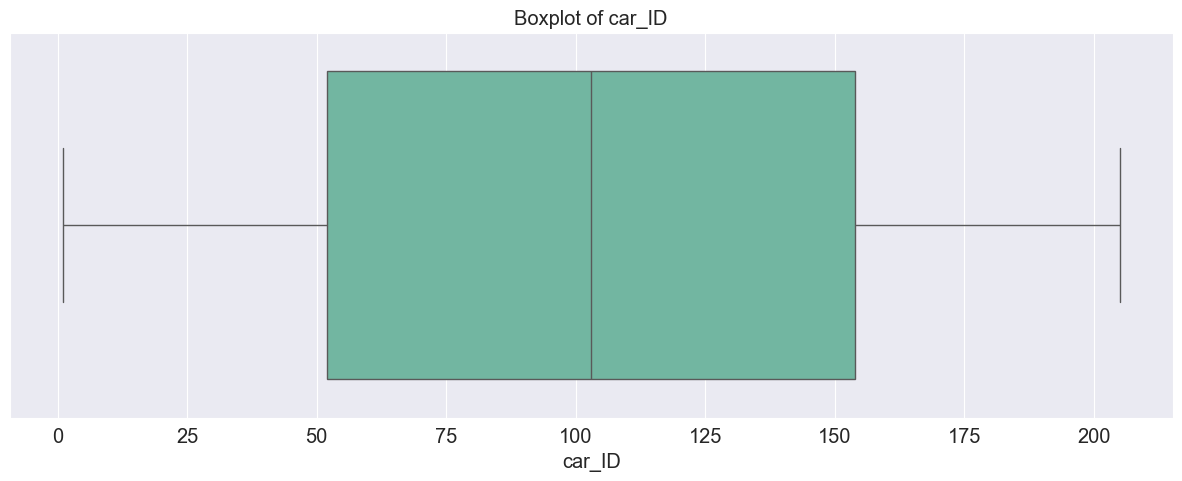

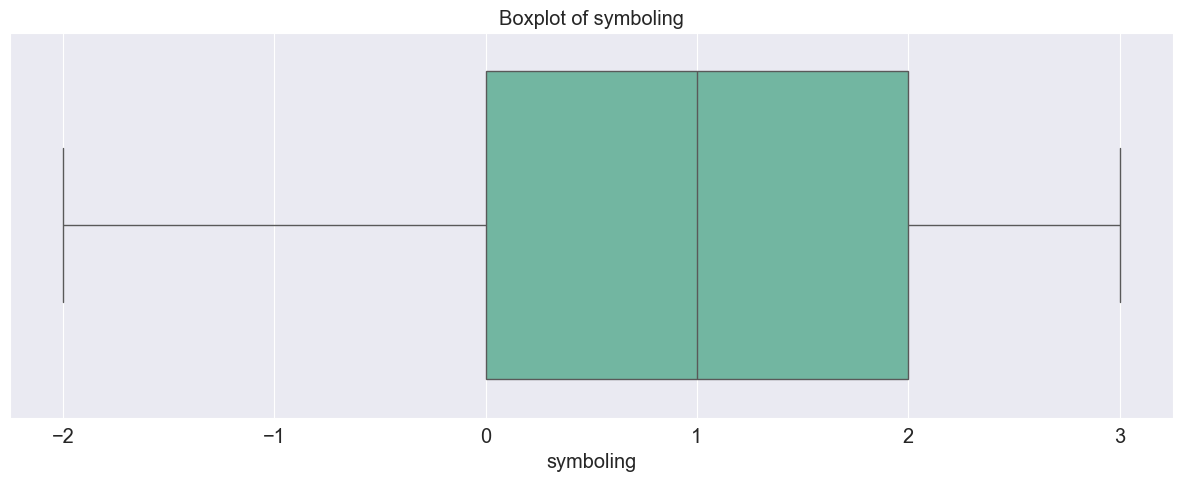


Unique values for CarName column: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'


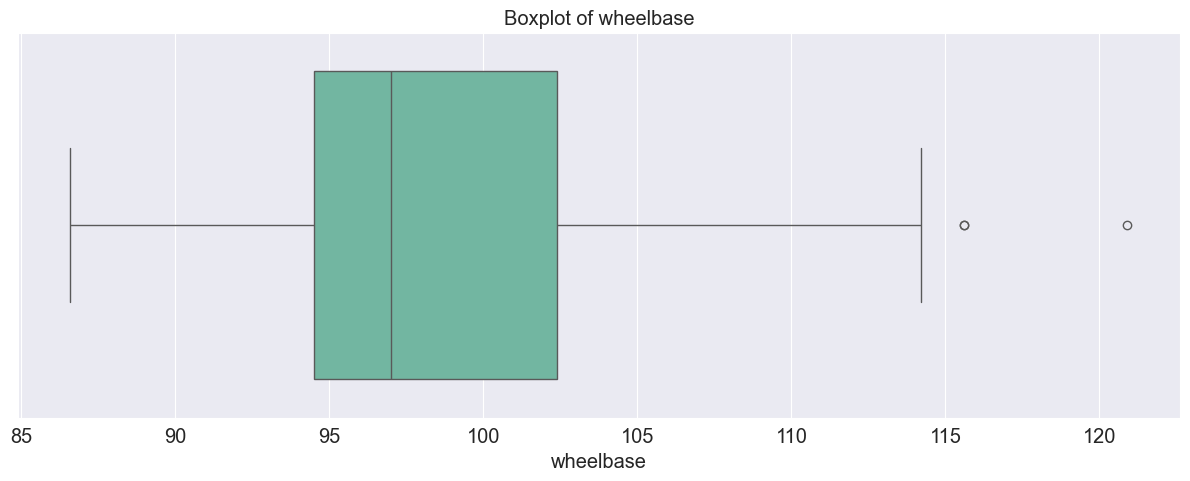

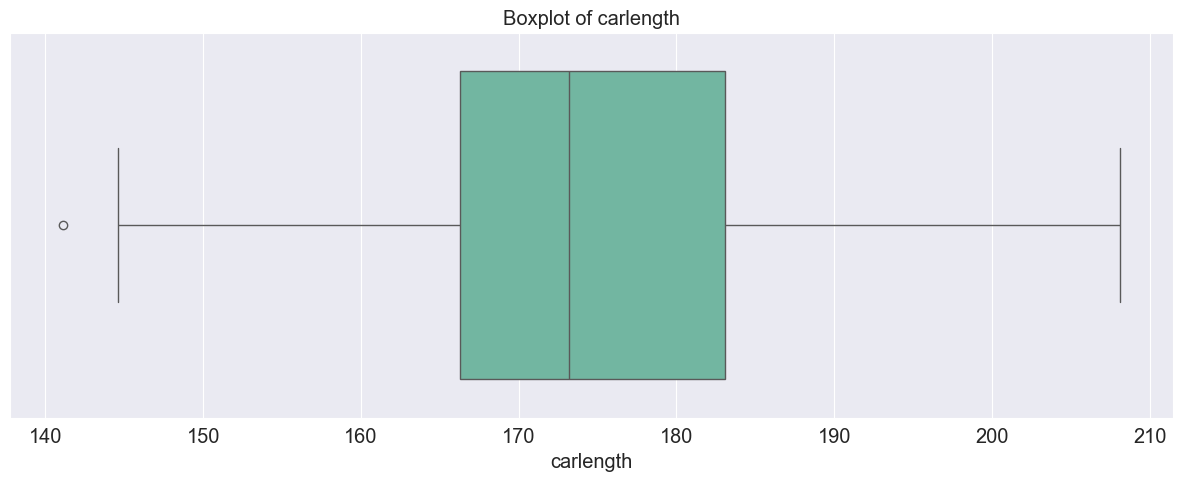

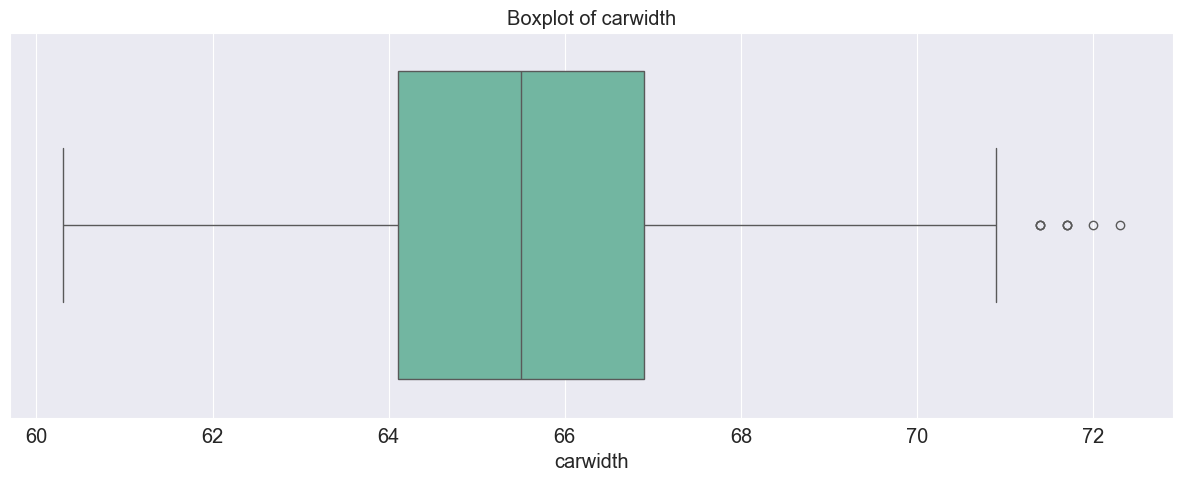

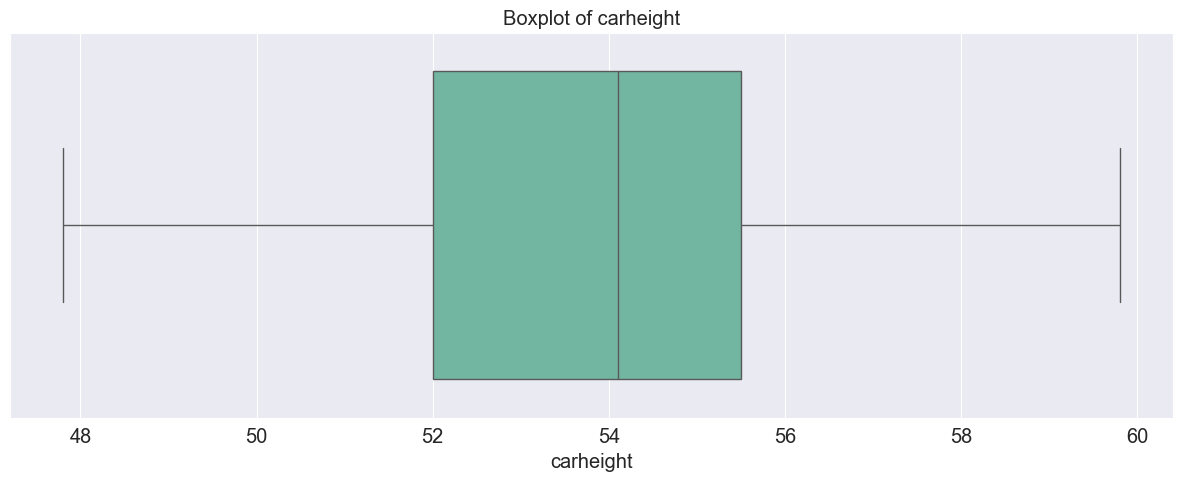

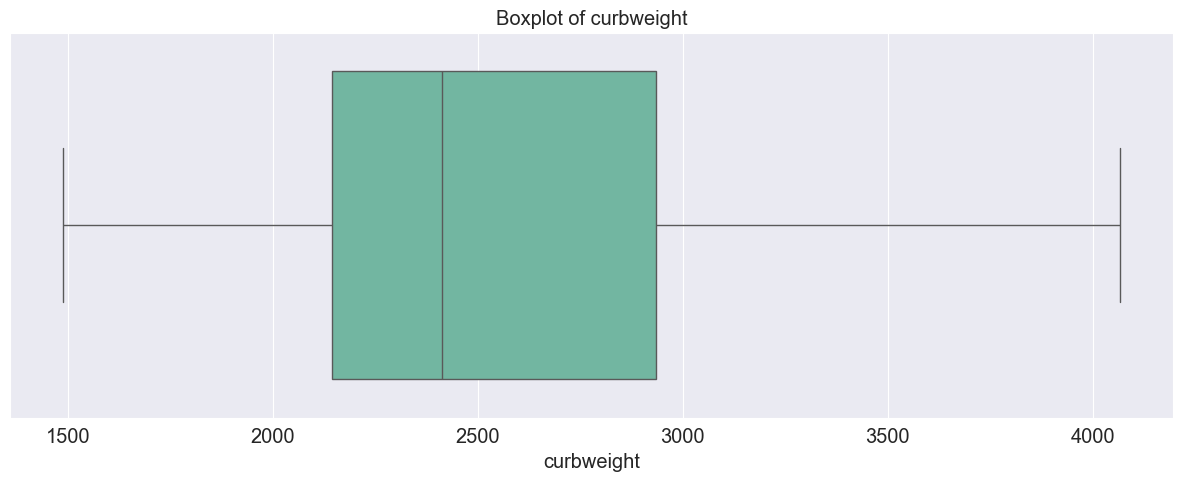


Unique values for enginetype column: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique values for cylindernumber column: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


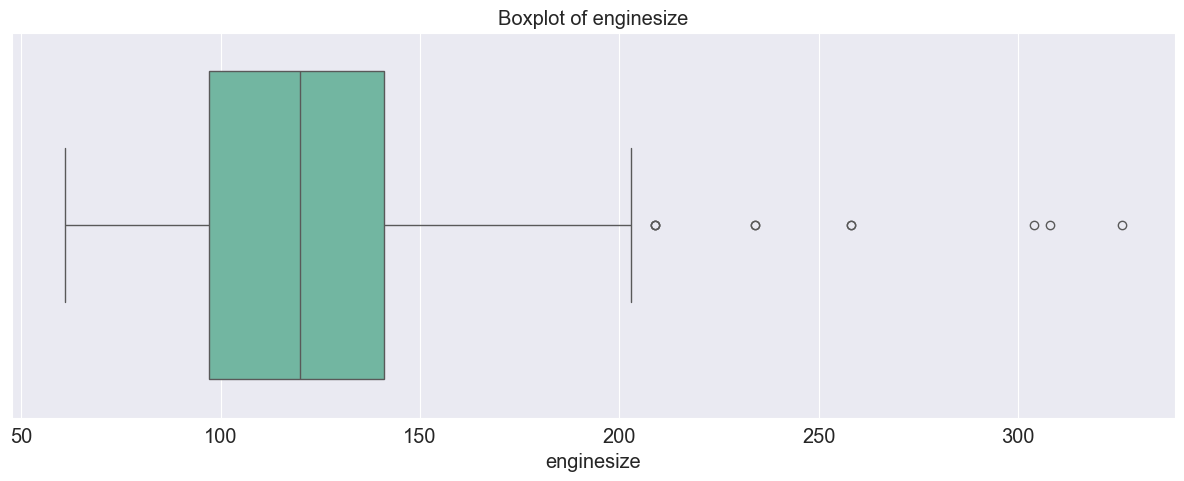


Unique values for fuelsystem column: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


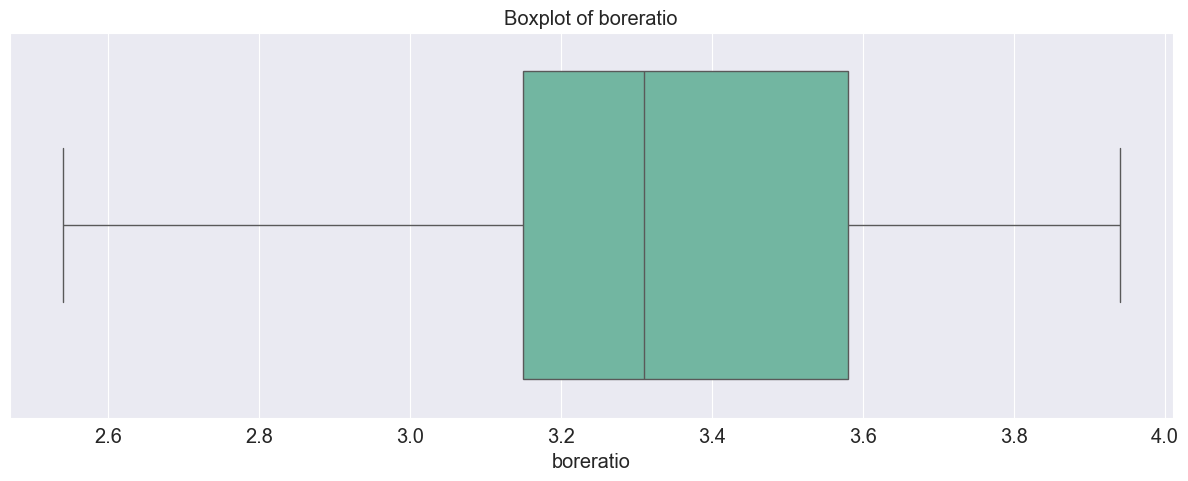

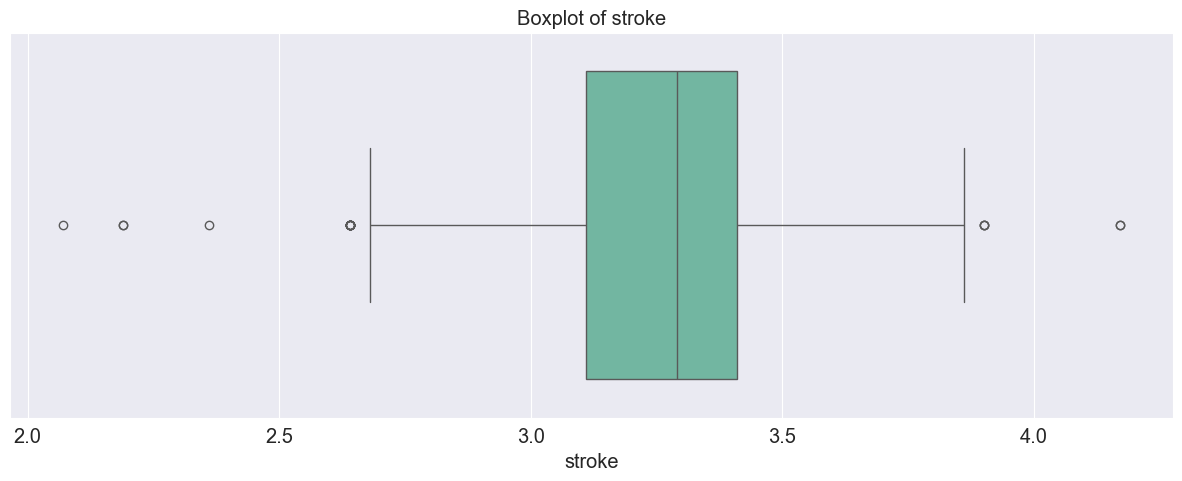

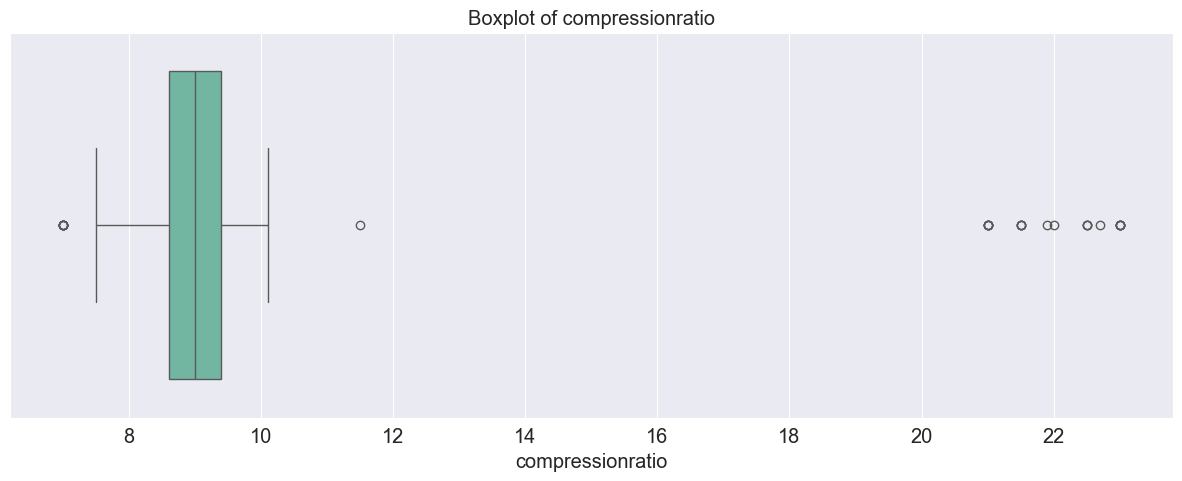

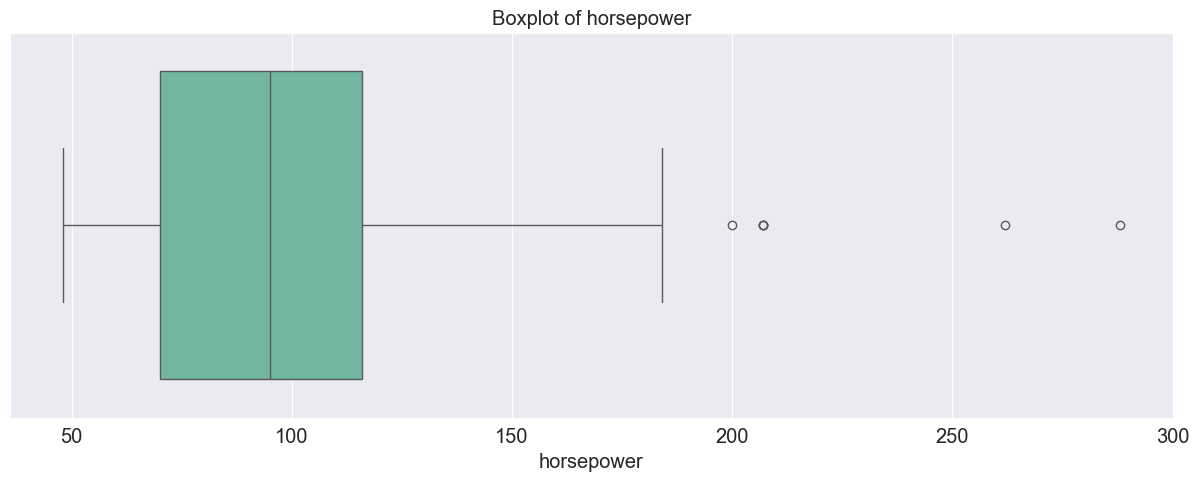

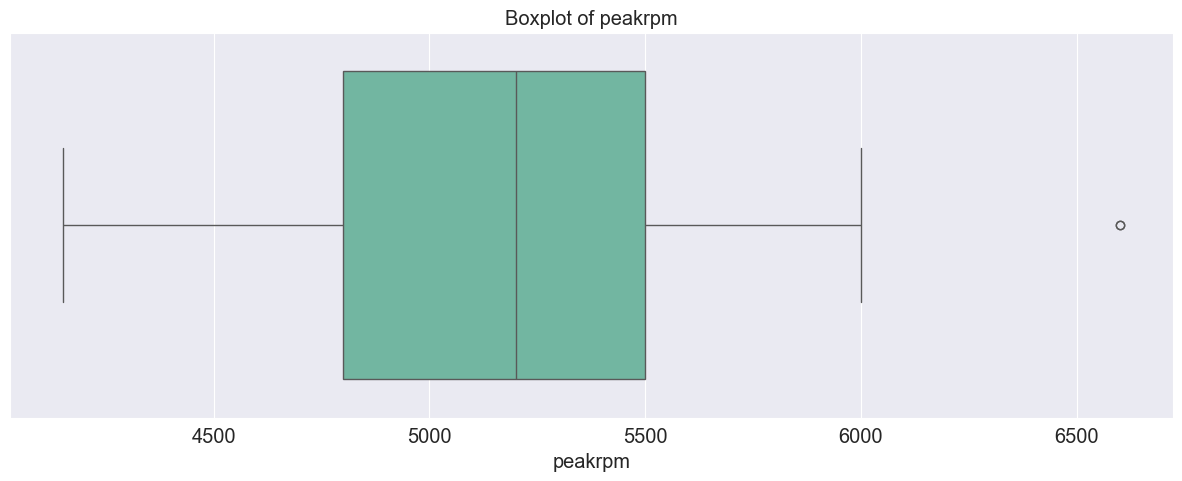

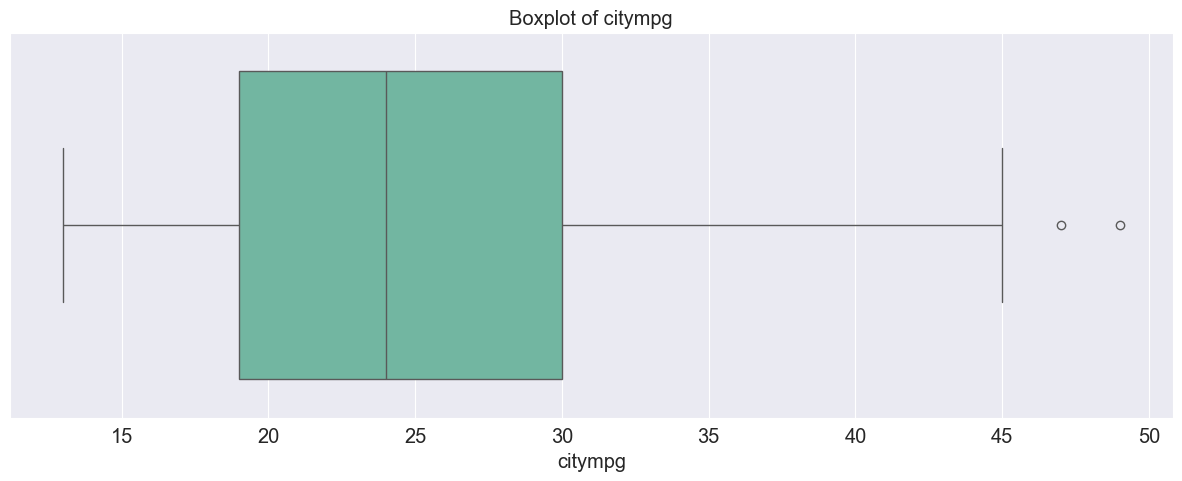

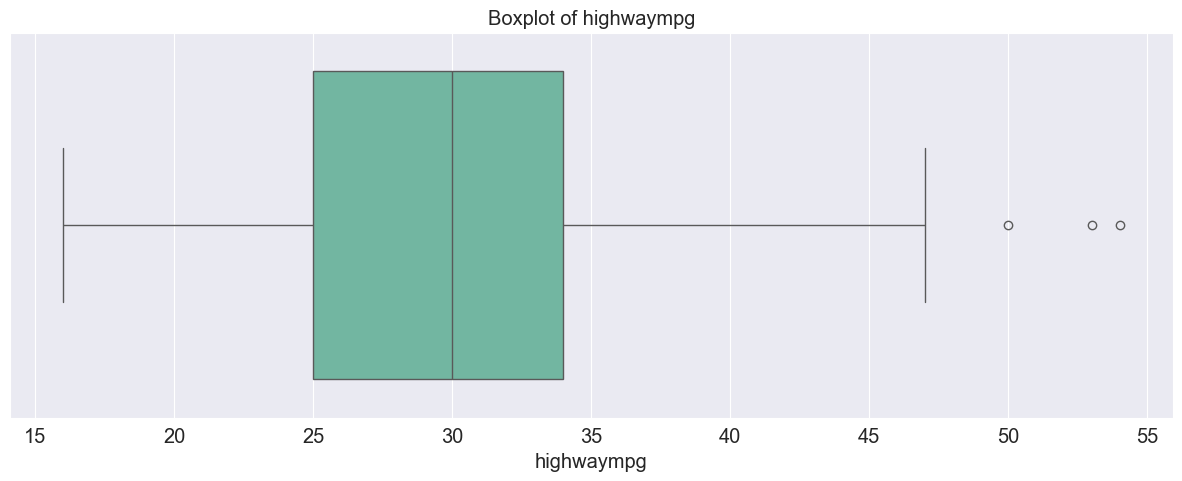

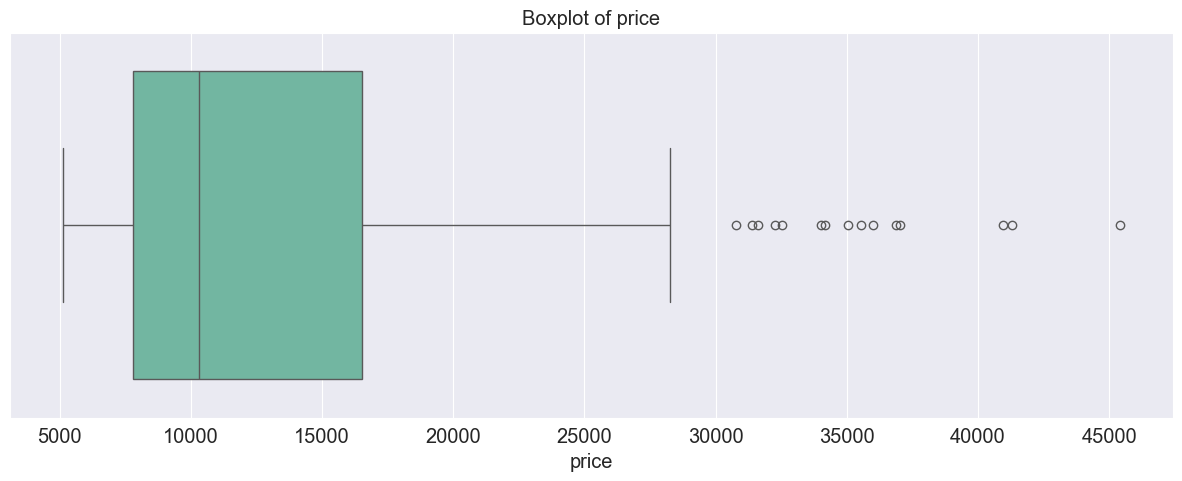

In [51]:
for column in cars.columns:
    if cars[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        sns.boxplot(x=cars[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', cars[column].unique())

In [52]:
# Remove outliers for numeric data using Isolation Forest
from sklearn.ensemble import IsolationForest
numeric_columns = cars.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05)
outlier_mask = iso_forest.fit_predict(cars[numeric_columns])
cars = cars[outlier_mask != -1]

In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            194 non-null    int64  
 1   symboling         194 non-null    int64  
 2   CarName           194 non-null    object 
 3   fueltype          194 non-null    object 
 4   aspiration        194 non-null    object 
 5   doornumber        194 non-null    object 
 6   carbody           194 non-null    object 
 7   drivewheel        194 non-null    object 
 8   enginelocation    194 non-null    object 
 9   wheelbase         194 non-null    float64
 10  carlength         194 non-null    float64
 11  carwidth          194 non-null    float64
 12  carheight         194 non-null    float64
 13  curbweight        194 non-null    int64  
 14  enginetype        194 non-null    object 
 15  cylindernumber    194 non-null    object 
 16  enginesize        194 non-null    int64  
 17  fu

**Answer:** There are now 194 rows i.e. 205 - 194 = 11 outliers have been removed.

**Q.2.1.3. Dealing with the unnecessary data**

In [54]:
# Check column names and types
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            194 non-null    int64  
 1   symboling         194 non-null    int64  
 2   CarName           194 non-null    object 
 3   fueltype          194 non-null    object 
 4   aspiration        194 non-null    object 
 5   doornumber        194 non-null    object 
 6   carbody           194 non-null    object 
 7   drivewheel        194 non-null    object 
 8   enginelocation    194 non-null    object 
 9   wheelbase         194 non-null    float64
 10  carlength         194 non-null    float64
 11  carwidth          194 non-null    float64
 12  carheight         194 non-null    float64
 13  curbweight        194 non-null    int64  
 14  enginetype        194 non-null    object 
 15  cylindernumber    194 non-null    object 
 16  enginesize        194 non-null    int64  
 17  fu

In [55]:
# Inspect unique values in each column
for column in cars.columns:
    print(column, cars[column].unique())

car_ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 205]
symboling [ 3  1  2  0 -1 -2]
CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i'

**Answer:** After observing the above data, the column car_id does not seem to provide any importance in predicting the price of the car. It is just the auto increment numbers with all rows having distinct values. Therefore, it is an unnecessary column and we can remove it.

In [56]:
# Drop unnecessary columns
columns_to_drop = ['car_ID']
cars = cars.drop(columns=columns_to_drop)

**Q.2.1.4. Dealing with the inconsistent data**

In [57]:
# Check unique values in categorical columns for inconsistencies
for column in cars.select_dtypes(include='object').columns:
    print(column, cars[column].unique())

CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet monte carlo' 'chevrolet vega 2300' 'dodge rampage'
 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic cvcc'
 'honda civic' 'honda accord cvcc' 'honda accord lx' 'honda civic 1500 gl'
 'honda accord' 'honda civic 1300' 'honda prelude' 'honda civic (auto)'
 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross' 'jaguar xj' 'maxda rx3'
 'maxda glc deluxe' 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe'
 'mazda 626' 'mazda glc' 'mazda rx-7 gs' 'mazda glc 4'
 'mazda glc custom l' 'mazda glc custom' 'buick electra 225 custom'
 'buick century luxus (sw)' 'buick century' 'mercury cougar'
 'mitsubishi mirage' 'mitsubishi lancer' 'mitsubishi 

**Answer:** After observing the above data, the data values 'audi 100 ls' and 'audi 100ls' seems like it is the same value, but they are being treated inconsistently due to a space value. Therefore, we will construct these values to be the same.

In [58]:
cars['CarName'] = cars['CarName'].replace('audi 100 ls', 'audi 100ls')
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100ls', 'audi fox', 'audi 5000',
       'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet monte carlo',
       'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se',
       'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop',
       'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic cvcc', 'honda civic',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'maxda rx3',
       'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4', 'mazda glc custom l', 'mazda glc custom',
       'buick electra 

**Q.2.1.5. Encoding categorical data**

In [59]:
# Find and Replace
cleanup_nums = {
    "doornumber":{
        "four": 4, 
        "two": 2
    },
    "cylindernumber":{
        "four": 4, 
        "six": 6, 
        "five": 5,
        "three": 3,
        "twelve": 12, 
        "two": 2, 
        "eight": 8
    }}

cars = cars.replace(cleanup_nums)

In [60]:
# Label Encoding
cars['CarName'] = cars['CarName'].astype('category').cat.codes
cars['fueltype'] = cars['fueltype'].astype('category').cat.codes
cars['aspiration'] = cars['aspiration'].astype('category').cat.codes
cars['carbody'] = cars['carbody'].astype('category').cat.codes
cars['drivewheel'] = cars['drivewheel'].astype('category').cat.codes
cars['enginelocation'] = cars['enginelocation'].astype('category').cat.codes
cars['enginetype'] = cars['enginetype'].astype('category').cat.codes
cars['fuelsystem'] = cars['fuelsystem'].astype('category').cat.codes

In [61]:
cars

symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0            3        2         1           0           2        0   
1            3        3         1           0           2        0   
2            1        1         1           0           2        2   
3            2        4         1           0           4        3   
4            2        4         1           0           4        3   
..         ...      ...       ...         ...         ...      ...   
199         -1      134         1           1           4        4   
200         -1      130         1           0           4        3   
201         -1      129         1           1           4        3   
202         -1      131         1           0           4        3   
204         -1      133         1           1           4        3   

     drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
0             2               0       88.6      168.8  ...         130   
1             2               0       88.6      168.8  ...         130   
2             2               0       94.5      171.2  ...         152   
3             1               0       99.8      176.6  ...         109   
4             0               0       99.4      176.6  ...         136   
..          ...             ...        ...        ...  ...         ...   
199           2               0      104.3      188.8  ...         130   
200           2               0      109.1      188.8  ...         141   
201           2               0      109.1      188.8  ...         141   
202           2               0      109.1      188.8  ...         173   
204           2               0      109.1      188.8  ...         141   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0             5       3.47    2.68               9.0         111     5000   
1             5       3.47    2.68               9.0         111     5000   
2             5       2.68    3.47               9.0         154     5000   
3             5       3.19    3.40              10.0         102     5500   
4             5       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
199           5       3.62    3.15               7.5         162     5100   
200           5       3.78    3.15               9.5         114     5400   
201           5       3.78    3.15               8.7         160     5300   
202           5       3.58    2.87               8.8         134     5500   
204           5       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
199       17          22  18950.0  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
204       19          25  22625.0  

[194 rows x 25 columns]

**Q.2.2. Visualize the dataset**

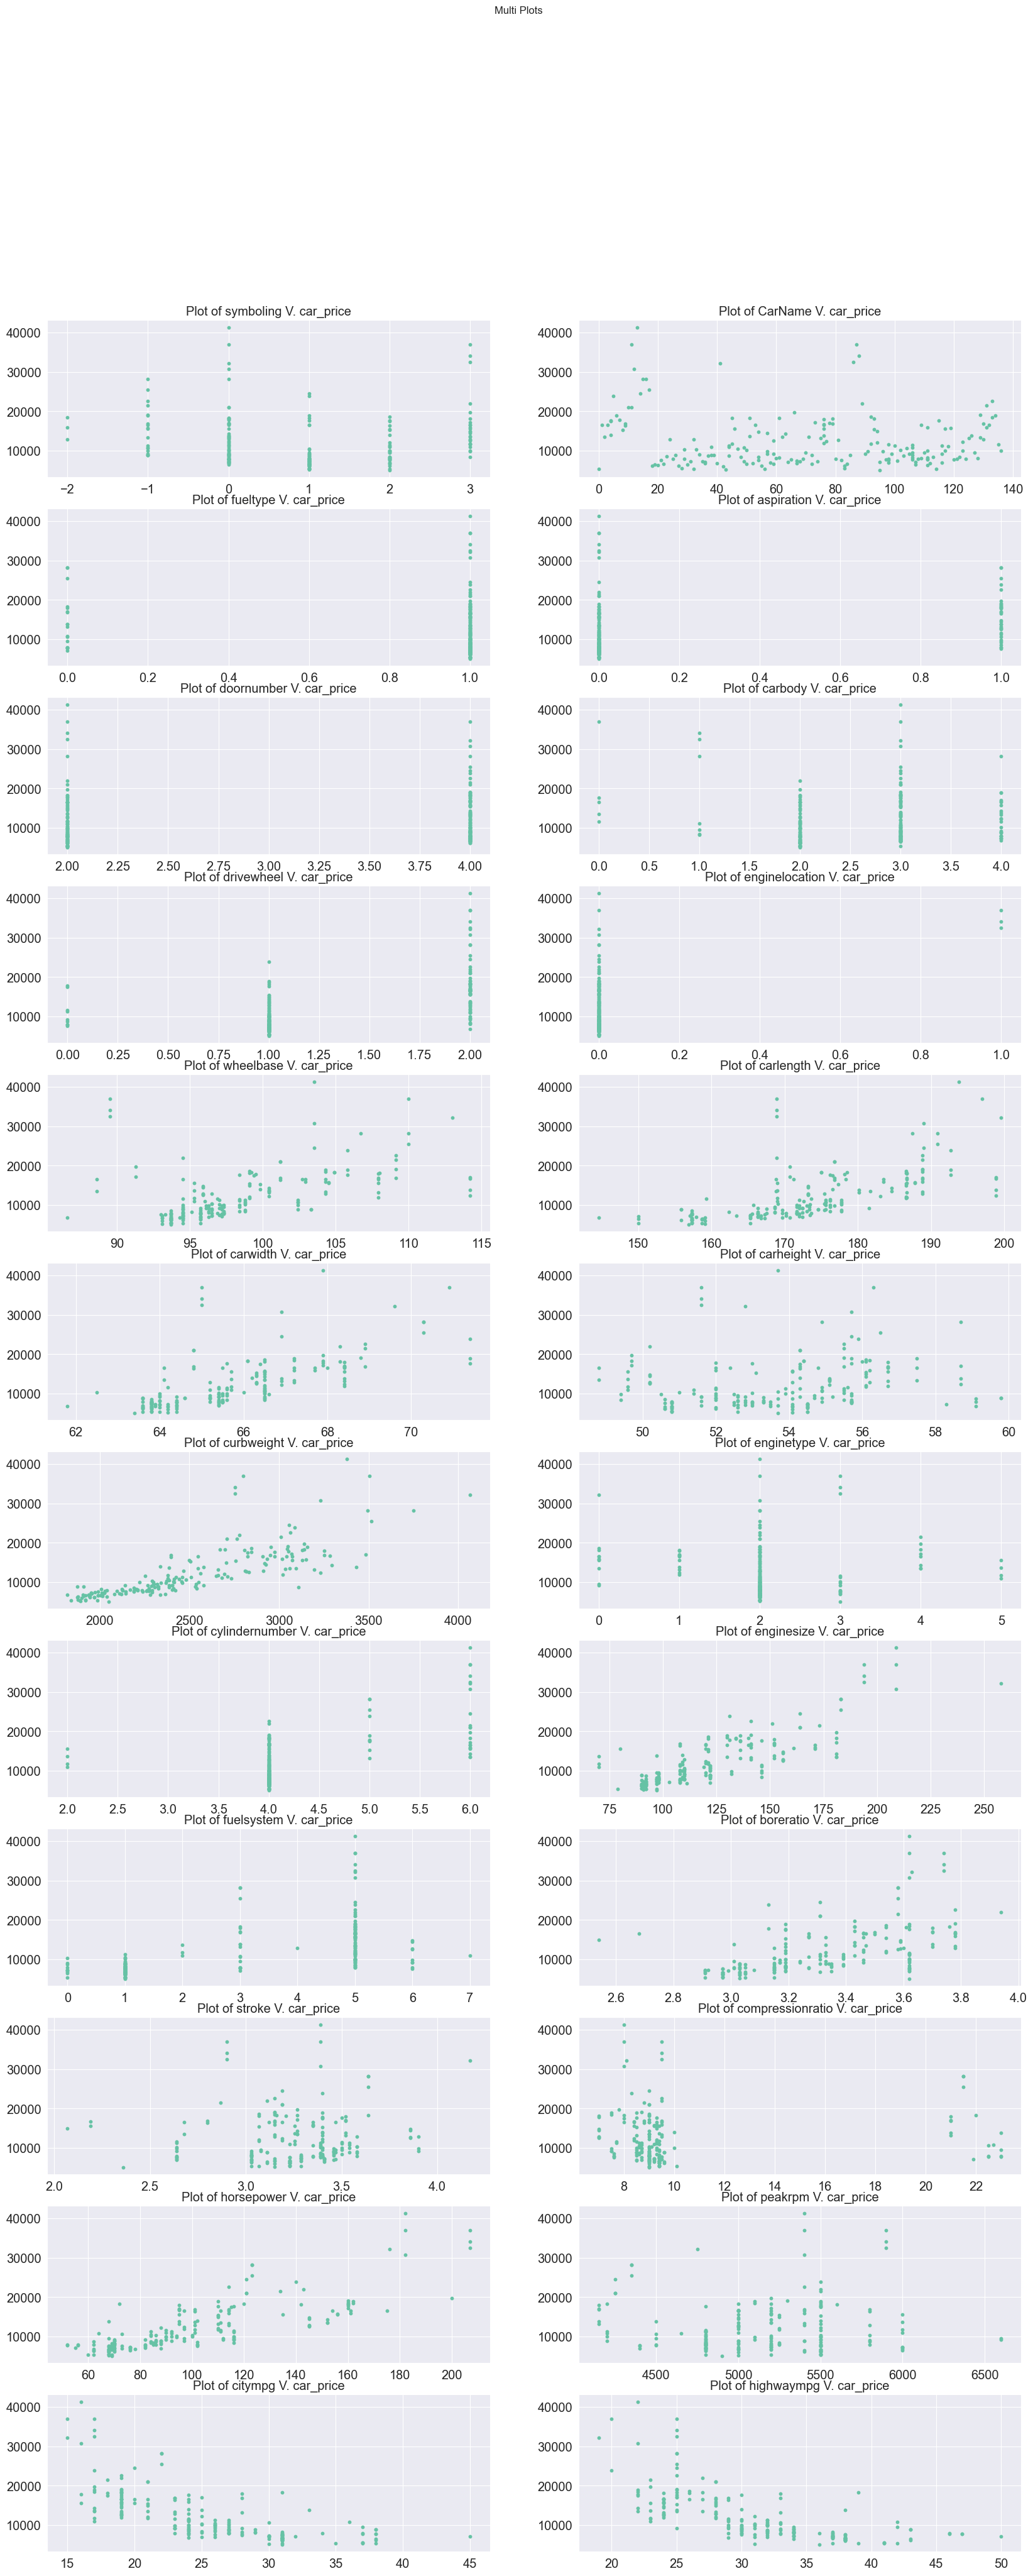

In [62]:
# Visualizing the dataset
num_cols = 2
num_rows = int((cars.shape[1]-1)/num_cols)+1

plt.figure(figsize=(20, 50))
for index, col in enumerate(cars.columns[:-1]):
    x = cars[col].values
    y = cars.iloc[:,-1:].values
    
    plt.subplot(num_rows, num_cols, index+1)
    plt.scatter(x,y, s=10)
    plt.title(f'Plot of {col} V. car_price')

plt.suptitle("Multi Plots")
plt.show()

<Axes: >

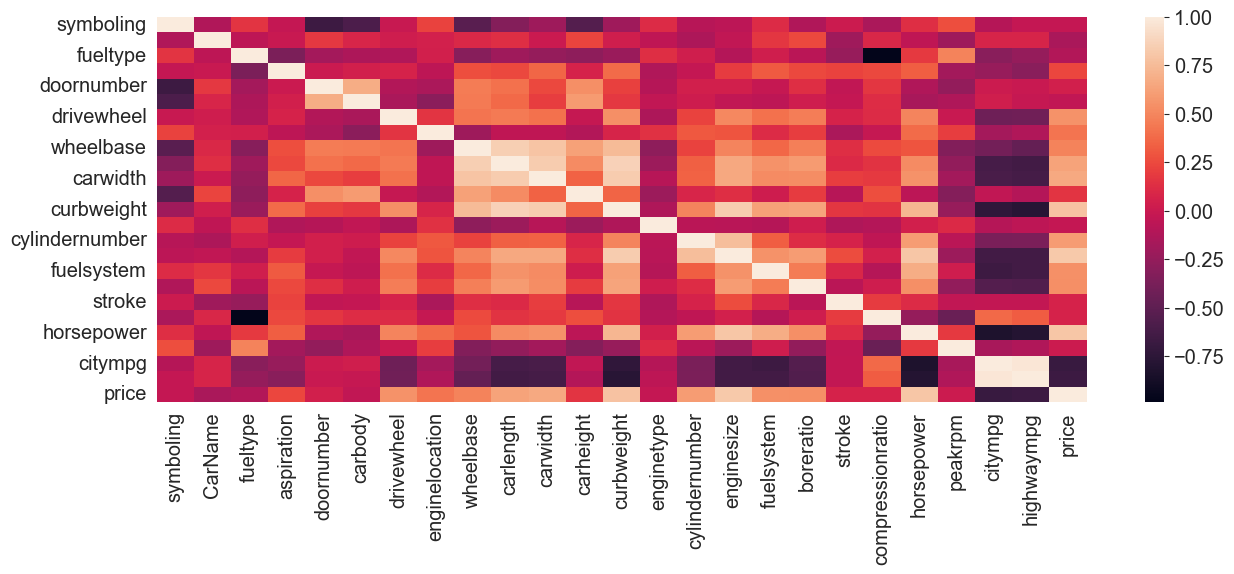

In [63]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(cars.corr())

In [64]:
# Calculate the correlation values of all the column with respect to the car price
correlation_values = cars.corrwith(cars.iloc[:, -1])
correlation_values

symboling          -0.030680
CarName            -0.151196
fueltype           -0.109500
aspiration          0.239001
doornumber          0.045364
carbody            -0.046631
drivewheel          0.551294
enginelocation      0.425483
wheelbase           0.487567
carlength           0.634504
carwidth            0.665443
carheight           0.155718
curbweight          0.785474
enginetype         -0.024359
cylindernumber      0.599789
enginesize          0.816157
fuelsystem          0.547862
boreratio           0.535802
stroke              0.064627
compressionratio    0.064471
horsepower          0.801344
peakrpm             0.007999
citympg            -0.683457
highwaympg         -0.667992
price               1.000000
dtype: float64

**Q.2.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

In [65]:
cars.describe()

symboling     CarName    fueltype  aspiration  doornumber     carbody  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean     0.850515   71.175258    0.907216    0.180412    3.134021    2.634021   
std      1.239808   38.557140    0.290879    0.385525    0.993543    0.848697   
min     -2.000000    0.000000    0.000000    0.000000    2.000000    0.000000   
25%      0.000000   40.250000    1.000000    0.000000    2.000000    2.000000   
50%      1.000000   73.500000    1.000000    0.000000    4.000000    3.000000   
75%      2.000000  106.000000    1.000000    0.000000    4.000000    3.000000   
max      3.000000  136.000000    1.000000    1.000000    4.000000    4.000000   

       drivewheel  enginelocation   wheelbase   carlength  ...  enginesize  \
count  194.000000      194.000000  194.000000  194.000000  ...  194.000000   
mean     1.298969        0.015464   98.386082  173.431959  ...  122.000000   
std      0.551305        0.123708    5.366106   11.238733  ...   31.404432   
min      0.000000        0.000000   86.600000  144.600000  ...   70.000000   
25%      1.000000        0.000000   94.500000  166.300000  ...   97.000000   
50%      1.000000        0.000000   96.700000  172.800000  ...  110.000000   
75%      2.000000        0.000000  101.200000  179.775000  ...  140.750000   
max      2.000000        1.000000  114.200000  199.600000  ...  258.000000   

       fuelsystem   boreratio      stroke  compressionratio  horsepower  \
count  194.000000  194.000000  194.000000        194.000000  194.000000   
mean     3.221649    3.322474    3.252268         10.069175  101.056701   
std      2.022502    0.264028    0.310835          3.876638   34.498808   
min      0.000000    2.540000    2.070000          7.000000   52.000000   
25%      1.000000    3.150000    3.112500          8.600000   70.000000   
50%      4.500000    3.310000    3.290000          9.000000   94.500000   
75%      5.000000    3.580000    3.410000          9.400000  116.000000   
max      7.000000    3.940000    4.170000         23.000000  207.000000   

           peakrpm     citympg  highwaympg         price  
count   194.000000  194.000000  194.000000    194.000000  
mean   5142.268041   25.365979   30.994845  12358.119418  
std     477.110268    5.993527    6.227548   6547.080688  
min    4150.000000   15.000000   19.000000   5118.000000  
25%    4800.000000   20.000000   25.000000   7778.250000  
50%    5200.000000   25.000000   30.000000   9992.000000  
75%    5500.000000   30.000000   35.500000  15735.000000  
max    6600.000000   45.000000   50.000000  41315.000000  

[8 rows x 25 columns]

**Answer:** The initial data set consists of 205 rows and 26 columns. The types of data held by the CSV files were int64, float64, and object. During the data cleaning process, we figured that there was no missing data. Therefore, we didn't have to perform any actions to deal with it. However, there exists a lot of irregular data (outliers) for which we used a boxplot to visualize and Isolation Forest to remove it. 11 rows were identified as an outliers and were removed resulting in 194 remaining rows. Moreover, the column 'car_id' does not provide any importance in predicting the price of the car. It is just the auto increment numbers with all rows having distinct values. Therefore, it is an unnecessary column and we removed it. This resulted in 24 remaining columns. Finally, we deal with some of the inconsistent data to make the data values 'audi 100 ls' and 'audi 100ls' consistent.

Also, from the heat map diagram and calculation of correlation, it was clear that the column 'symboling', 'doornumber', 'carbody', 'enginetype', 'stroke', 'compressionration', and 'peakpm' have a low impact on the dependent variable 'price' whereas 'enginesize' and 'horsepower' seem to have the highest impact.

**Q2.4. Build a multilayer perceptron model to predict the car price based on the other features in the dataset**

In [66]:
# Getting independent and dependent variables 
y = cars.price.values
X = cars.drop(['price'], axis=1)

In [67]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Standardize features
scaler_standardize = StandardScaler()
X_train_scaled = scaler_standardize.fit_transform(X_train)
X_test_scaled = scaler_standardize.transform(X_test)

In [69]:
# Normalization of the features
from sklearn.preprocessing import MinMaxScaler
scaler_normalize = MinMaxScaler()
X_train_scaled = scaler_normalize.fit_transform(X_train_scaled)
X_test_scaled = scaler_normalize.transform(X_test_scaled)

In [70]:
X_train_scaled

array([[0.8       , 0.05882353, 1.        , ..., 0.55102041, 0.13333333,
        0.16666667],
       [0.4       , 0.73529412, 1.        , ..., 0.26530612, 0.3       ,
        0.3       ],
       [1.        , 0.67647059, 1.        , ..., 0.44897959, 0.2       ,
        0.26666667],
       ...,
       [0.4       , 0.45588235, 1.        , ..., 0.42857143, 0.06666667,
        0.06666667],
       [1.        , 0.99264706, 1.        , ..., 0.55102041, 0.3       ,
        0.3       ],
       [0.4       , 0.55882353, 1.        , ..., 0.34693878, 0.13333333,
        0.13333333]])

In [71]:
X_test_scaled

array([[ 0.4       ,  0.72058824,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.37318841,  0.53406998,
         0.375     ,  0.55454545,  0.3112377 ,  0.6       ,  0.5       ,
         0.27338129,  0.14285714,  0.77142857,  0.31147541,  0.125     ,
         0.23076923,  0.26530612,  0.26666667,  0.3       ],
       [ 0.4       ,  0.09558824,  1.        ,  0.        ,  0.        ,
         0.75      ,  1.        ,  0.        ,  0.61231884,  0.90607735,
         0.63541667,  0.44545455,  0.80838944,  0.4       ,  1.        ,
         1.        ,  0.71428571,  0.77142857,  0.72131148,  0.0625    ,
         1.        ,  0.51020408,  0.03333333,  0.06666667],
       [ 0.6       ,  0.77205882,  1.        ,  0.        ,  0.        ,
         0.75      ,  1.        ,  0.        ,  0.28623188,  0.44383057,
         0.22916667,  0.34545455,  0.23096841,  0.        ,  0.5       ,
         0.20143885,  0.71428571,  0.5       ,  0.55191257,  0.15      ,
  

In [72]:
# Create MLP Regressor
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(500, 300),
                             activation='tanh',
                             solver='adam',
                             max_iter=90000,
                             alpha=0.1,
                             random_state=42)

In [73]:
# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(activation='tanh', alpha=0.1, hidden_layer_sizes=(500, 300),
             max_iter=90000, random_state=42)

In [74]:
# Predictions
y_pred = mlp_regressor.predict(X_test_scaled)

In [75]:
y_pred

array([11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759, 11815.45559759,
       11815.45559759, 11815.45559759, 11815.45559759])

In [76]:
y_test

array([ 8013.   , 41315.   ,  9298.   , 19699.   ,  6189.   ,  8058.   ,
        8845.   , 30760.   ,  6692.   ,  6229.   , 12940.   ,  6295.   ,
        6649.   , 17859.167, 10698.   , 32528.   ,  6669.   ,  7609.   ,
       19045.   , 37028.   , 12170.   ,  7898.   , 16503.   , 32250.   ,
        9639.   , 12764.   ,  5389.   , 14399.   ,  5399.   , 13860.   ,
       34028.   , 14489.   ,  6692.   ,  7775.   , 18620.   , 15998.   ,
        6575.   , 16558.   , 12629.   ])

In [77]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 99819688.02494264


In [78]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0787054780787424

**Q2.5. Tune the model's hyperparameters and discuss the results.**

In [79]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(500,), (500, 500)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.1],
}

# Perform Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(MLPRegressor(max_iter=90000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

C:\Users\Student99\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Student99\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Student99\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Student99\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900

Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (500,), 'solver': 'adam'}


C:\Users\Student99\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [80]:
# Evaluate model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Best Model Mean Squared Error:", mse)

Best Model Mean Squared Error: 32056333.669763386


In [81]:
# Calculating the R squared value
r2_score(y_test, y_pred)

0.6535819393860135

**Answer:** In the beginning, the MLPRegressor was built using two hidden layers with 500 and 300 nodes. 'Tanh' was used as an activation function, and 'adam' was used as a solver. The model had a Mean Squared Error of 99M. However, after the hyperparameter tuning of this model, we received a Mean Squared Error of 32M, which shows a decrease in model error and hence an increase in model performance. The model, which was built after hyperparameter tuning, has the same parameters as the prior one, except for the hidden layer, which is now one layer with 500 nodes. Moreover, the R squared value has also improved from -0.078 to 0.65.

<div class="alert alert-block alert-info">

# Part 2: Reflection 

</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**Answer:**

1. I really liked this week's lab activity content. It covered both linear and logistic regression problems from our first and second labs. This helped us review those topics while also learning about the new Multilayer Perceptron technique. The inclusion of a previous lab allowed us to reuse pre-processing and visualization steps, saving time and letting us focus on MLP techniques. Plus, we could compare results between old methods and this new algorithm.

2. Understanding the concept of the Multilayer Perceptron technique is really important. It helps us solve complicated problems better by looking at data in a smart way. It lets us recognize patterns and make predictions, which are essential for various applications like weather forecasting, medical diagnosis, and financial analysis. By mastering MLP, we open doors to innovative solutions and advancements in artificial intelligence. Moreover, as we learn more about Multilayer Perceptron techniques, we become better at solving complex problems. This allows us to contribute to making technology smarter and finding creative solutions in our field.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab6.ipynb** to the **Lab 6 - Classification and Regression Using Multilayer Perceptron (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.5          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.5          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
